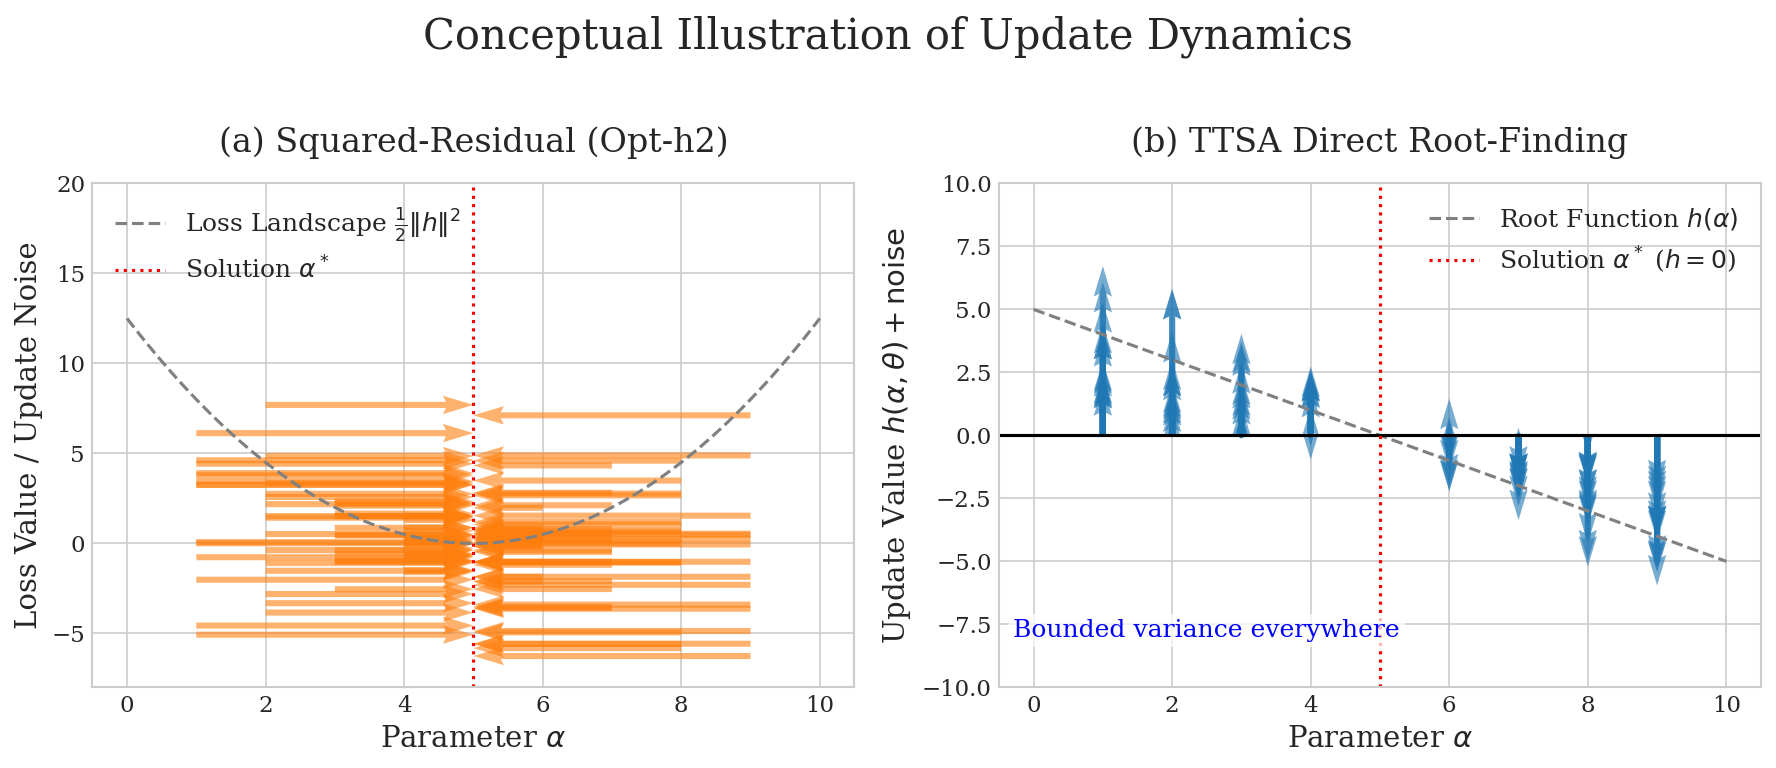

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 设置绘图风格和参数 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 12,
    'figure.dpi': 150
})

# --- 2. 创建图形和子图 ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Conceptual Illustration of Update Dynamics", fontsize=20, y=1.02)

# --- 3. 定义一个简单的理想化模型 ---
alpha_star = 5.0  # 真实的根
alpha_range = np.linspace(alpha_star - 4, alpha_star + 4, 9) # 在不同位置展示更新

def h(alpha):
    return alpha_star - alpha


ax1.set_title("(a) Squared-Residual (Opt-h2)", pad=15)

alpha_dense = np.linspace(0, 10, 100)
loss = 0.5 * h(alpha_dense)**2
ax1.plot(alpha_dense, loss, color='gray', linestyle='--', label=r'Loss Landscape $\frac{1}{2}\|h\|^2$')
ax1.axvline(alpha_star, color='red', linestyle=':', lw=1.5, label=r'Solution $\alpha^*$')

# 绘制随机梯度 (关键部分)
for alpha_val in alpha_range:
    if alpha_val == alpha_star: continue

    mean_update = (alpha_star - alpha_val)
    variance_scale = 0.8 * h(alpha_val)**2
    noise = np.random.normal(0, np.sqrt(variance_scale), 15)

    ax1.quiver(
        [alpha_val]*len(noise),
        noise,
        [mean_update]*len(noise),
        [0]*len(noise),
        color='#ff7f0e', alpha=0.6, width=0.008, scale=1, scale_units='xy', angles='xy'
    )

ax1.set_xlabel(r'Parameter $\alpha$')
ax1.set_ylabel('Loss Value / Update Noise')

ax1.legend(loc='upper left')
ax1.set_ylim(-8, 20)


# --- 5. 绘制右图: (b) TTSA (Direct Root-Finding) - 方差有界 ---
ax2.set_title("(b) TTSA Direct Root-Finding", pad=15)


ax2.plot(alpha_dense, h(alpha_dense), color='gray', linestyle='--', label=r'Root Function $h(\alpha)$')
ax2.axhline(0, color='black', lw=1.5) # 目标是 h=0
ax2.axvline(alpha_star, color='red', linestyle=':', lw=1.5, label=r'Solution $\alpha^*$ ($h=0$)')


for alpha_val in alpha_range:
    if alpha_val == alpha_star: continue

    mean_update = h(alpha_val)
    constant_variance_scale = 1.5
    noise = np.random.normal(0, np.sqrt(constant_variance_scale), 15)

    ax2.quiver(
        [alpha_val]*len(noise),
        [0]*len(noise),
        [0]*len(noise),
        mean_update + noise,
        color='#1f77b4', alpha=0.6, width=0.008, scale=1, scale_units='xy', angles='xy'
    )

ax2.set_xlabel(r'Parameter $\alpha$')
ax2.set_ylabel(r'Update Value $h(\alpha, \theta) + \text{noise}$')

ax2.legend(loc='best')
ax2.text(2.5, -8, 'Bounded variance everywhere', fontsize=12, color='blue', ha='center', bbox=text_bbox)
ax2.set_ylim(-10, 10)

plt.tight_layout()
#plt.savefig("conceptual_figure.pdf", bbox_inches='tight')
plt.show()

开始多seed实验...

运行 Seed 1/5 (seed=80)...

种子 80 的估计情况：
  TTSA:
    α* = 0.9483
    α_final = 0.8707
    |α_final - α*| = 0.0776
    Iter to ε = 3000
  Opt-h2:
    α* = 0.9483
    α_final = 0.8229
    |α_final - α*| = 0.1254
    Iter to ε = 3000
  Single-Scale:
    α* = 0.9483
    α_final = 4.5828
    |α_final - α*| = 3.6345
    Iter to ε = 19
  Seed 80 完成. α*=0.9483

运行 Seed 2/5 (seed=93)...

种子 93 的估计情况：
  TTSA:
    α* = 0.9565
    α_final = 0.8702
    |α_final - α*| = 0.0863
    Iter to ε = 3000
  Opt-h2:
    α* = 0.9565
    α_final = 0.8225
    |α_final - α*| = 0.1340
    Iter to ε = 3000
  Single-Scale:
    α* = 0.9565
    α_final = 4.5651
    |α_final - α*| = 3.6086
    Iter to ε = 15
  Seed 93 完成. α*=0.9565

运行 Seed 3/5 (seed=1)...

种子 1 的估计情况：
  TTSA:
    α* = 0.9890
    α_final = 0.8748
    |α_final - α*| = 0.1141
    Iter to ε = 3000
  Opt-h2:
    α* = 0.9890
    α_final = 0.7863
    |α_final - α*| = 0.2027
    Iter to ε = 3000
  Single-Scale:
    α* = 0.9890
    α_final = 4.767

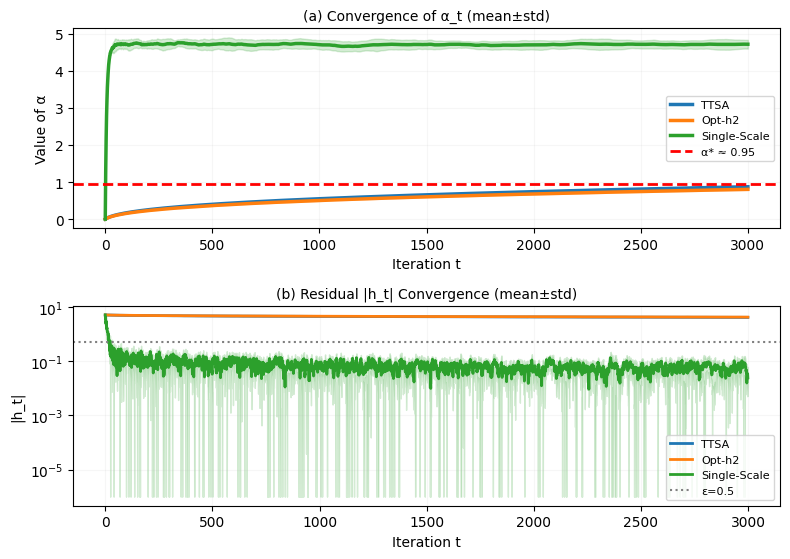


生成 Figure 1(c-d)...


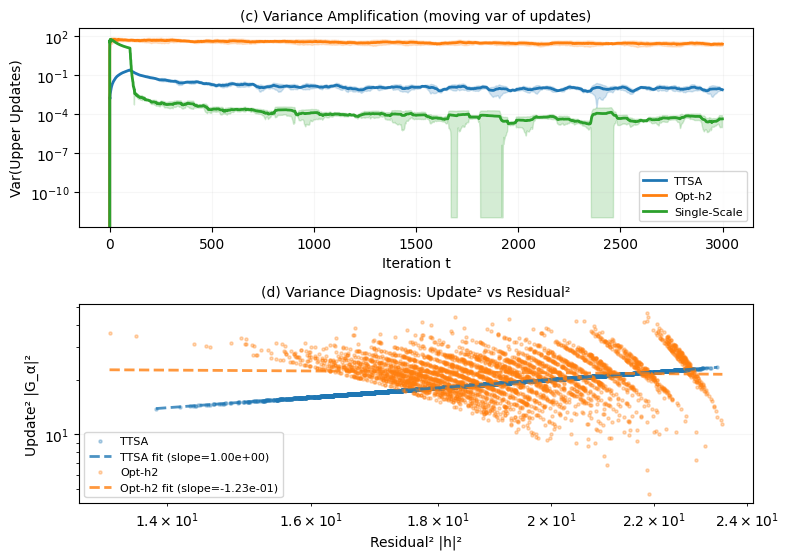


Table 1: Synthetic Quadratic RF-BO Results Summary
      Method |α_final - α*| Iter to ε Var_upper Var_ratio     Slope p-value vs TTSA
        TTSA  0.0927±0.0121    3000±0  1.72e+01      1.00  1.00e+00             N/A
      Opt-h2  0.1630±0.0290    3000±0  2.03e+01      1.15 -5.21e-02           0.006
Single-Scale  3.7480±0.1084      16±2  5.16e-03      1.00       N/A           0.000

实验完成！Figure 1(a-b), 1(c-d) 和 Table 1 (含p-value) 已生成。


In [8]:
#第一个实验
#内容：跑模拟并且绘制正文的图，在最后新增p-value计算
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# =============================================================================
# 1. 实验设置 (Experiment Setup)
# =============================================================================
# 多seed设置
NUM_SEEDS = 5
SEEDS = [80, 93, 1, 11, 3, 7, 24, 1024, 10, 20, 27, 39, 69, 94, 63, 14, 66, 76, 58, 77, 83, 81, 67, 60, 70, 88, 72, 78, 99, 92, 96, 17, 21, 16, 34, 26, 8, 28, 12, 40, 32, 25, 37, 4, 31, 9, 18, 15][:NUM_SEEDS]

# 定义模型和数据参数
d = 10
N = 1000
C = 5.0
lambda_reg = 0.1
kappa = 0.001  # 降低二次项系数以提高数值稳定性

# 定义训练参数
T = 3000
batch_size = 128
alpha_init = 0.0
theta_init = np.zeros(d)

# probe 设置
probe_every = 200
K_probe = 50

# 收敛阈值（用于计算 iterations to ε）
epsilon = 0.5

# =============================================================================
# 2. 辅助函数：计算 theta^*(\alpha)
# =============================================================================
def compute_theta_star(alpha, X_data, lambda_reg, kappa, max_iter=100, tol=1e-6):
    theta = np.zeros(d)
    for _ in range(max_iter):
        residuals = X_data @ theta - alpha
        grad = (X_data.T @ residuals) / N + lambda_reg * theta + 4 * kappa * (theta**3)
        # 梯度裁剪
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 10.0:
            grad = grad / grad_norm * 10.0
        theta_new = theta - 0.005 * grad  # 更小的固定步长
        if np.linalg.norm(theta_new - theta) < tol:
            break
        theta = theta_new
    return theta

# =============================================================================
# 3. 运行单个seed的函数
# =============================================================================
def run_single_seed(seed):
    np.random.seed(seed)

    # 生成数据：降低协方差矩阵条件数
    theta_true = np.random.randn(d)
    theta_true[0] += 3.0
    cov = np.diag([5.0] + [1.0] * (d-1))  # 适度病态协方差
    X_data = np.random.multivariate_normal([3.0] + [0.0] * (d-1), cov, N) + np.random.normal(0, 0.2, (N, d))

    # 计算真实解
    A_true = (X_data.T @ X_data / N) + lambda_reg * np.eye(d)
    b_true = np.mean(X_data, axis=0)
    A_inv_true = np.linalg.inv(A_true)
    alpha_star_guess = 5.0
    theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
    denominator = theta_true.T @ theta_star
    if abs(denominator) < 1e-10:
        theta_true = np.random.randn(d) + np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
        denominator = theta_true.T @ theta_star
    alpha_star = C / denominator

    # 初始化
    methods = ['TTSA', 'Opt-h2', 'Single-Scale']
    thetas = {m: theta_init.copy() for m in methods}
    alphas = {m: alpha_init for m in methods}

    history = {
        'alpha': {m: [alpha_init] for m in methods},
        'h_sq': {m: [] for m in methods},
        'update_norm_sq': {m: [] for m in methods},
        'h_values': {m: [] for m in methods},
        'probe': {},
        'converge_iter': {m: None for m in methods}
    }

    # 主循环
    for t in range(1, T + 1):
        eta_t = 0.5 / (t + 10)**0.5


        #########################消融实验只做这个###########################
        #gamma_t = 0.05 / (t + 10)**0.6
        gamma_t = 0.0035 / (t + 10)**0.6


        gamma_base_opth2_fixed = 0.003
        gamma_t_opth2_fixed = gamma_base_opth2_fixed / (t + 10)**0.6


        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_data[indices]

        #step_sizes = {'TTSA': gamma_t, 'Opt-h2': gamma_t, 'Single-Scale': eta_t}
        step_sizes = {'TTSA': gamma_t, 'Opt-h2': gamma_t_opth2_fixed, 'Single-Scale': eta_t}
        for method in methods:
            # 更新 theta
            residuals = X_batch @ thetas[method] - alphas[method]
            grad_theta = (X_batch.T @ residuals) / batch_size + lambda_reg * thetas[method] + 4 * kappa * (thetas[method]**3)
            # 梯度裁剪
            grad_norm = np.linalg.norm(grad_theta)
            if grad_norm > 10.0:
                grad_theta = grad_theta / grad_norm * 10.0
            thetas[method] -= eta_t * grad_theta

            # 计算 h_t
            h_t = theta_true.T @ thetas[method] - C

            # 更新 alpha
            update_direction = 0
            if method == 'TTSA' or method == 'Single-Scale':
                update_direction = h_t
            elif method == 'Opt-h2':
                A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
                b_batch = np.mean(X_batch, axis=0)
                try:
                    A_batch_inv = np.linalg.inv(A_batch)
                    jacobian_approx = A_batch_inv @ b_batch
                    nabla_alpha_h = theta_true.T @ jacobian_approx
                    update_direction = h_t * nabla_alpha_h
                except np.linalg.LinAlgError:
                    update_direction = h_t

            alphas[method] -= step_sizes[method] * update_direction

            # 记录
            history['alpha'][method].append(alphas[method])
            history['h_sq'][method].append(h_t**2)
            history['h_values'][method].append(h_t)
            history['update_norm_sq'][method].append(update_direction**2)

            # 检查收敛
            if history['converge_iter'][method] is None and abs(h_t) < epsilon:
                history['converge_iter'][method] = t

        # probe sampling
        if t % probe_every == 0:
            for method in ['TTSA', 'Opt-h2']:
                h_s, g_ttsa, g_opth2 = sample_G_alpha(alphas[method], theta_true, X_data, N, d, lambda_reg, K_probe, batch_size)
                if method not in history['probe']:
                    history['probe'][method] = {'mean_h_sq': [], 'var_g': [], 'h_sq_vals': [], 'update_sq_vals': []}
                history['probe'][method]['mean_h_sq'].append(np.mean(h_s**2))
                if method == 'TTSA':
                    history['probe'][method]['var_g'].append(np.var(g_ttsa))
                    history['probe'][method]['h_sq_vals'].extend(h_s**2)
                    history['probe'][method]['update_sq_vals'].extend(g_ttsa**2)
                else:
                    history['probe'][method]['var_g'].append(np.var(g_opth2))
                    history['probe'][method]['h_sq_vals'].extend(h_s**2)
                    history['probe'][method]['update_sq_vals'].extend(g_opth2**2)

    # 输出每个种子的估计情况
    print(f"\n种子 {seed} 的估计情况：")
    for method in methods:
        final_alpha = history['alpha'][method][-1]
        error = abs(final_alpha - alpha_star) if not np.isnan(final_alpha) else np.inf
        converge_iter = history['converge_iter'][method] if history['converge_iter'][method] is not None else T
        print(f"  {method}:")
        print(f"    α* = {alpha_star:.4f}")
        print(f"    α_final = {final_alpha:.4f}")
        print(f"    |α_final - α*| = {error:.4f}")
        print(f"    Iter to ε = {converge_iter}")

    return history, alpha_star, theta_true, X_data

def sample_G_alpha(alpha_val, theta_true, X_data, N, d, lambda_reg, K, batch_size):
    h_s = np.zeros(K)
    g_ttsa = np.zeros(K)
    g_opth2 = np.zeros(K)
    for k in range(K):
        idx = np.random.choice(N, batch_size, replace=False)
        Xb = X_data[idx]
        A_b = (Xb.T @ Xb) / batch_size + lambda_reg * np.eye(d)
        b_b = np.mean(Xb, axis=0)
        try:
            A_b_inv = np.linalg.inv(A_b)
        except np.linalg.LinAlgError:
            A_b_inv = np.linalg.pinv(A_b)
        jac = A_b_inv @ b_b
        theta_star_b = jac * alpha_val
        h_b = theta_true.T @ theta_star_b - C
        h_s[k] = h_b
        g_ttsa[k] = h_b
        g_opth2[k] = h_b * (theta_true.T @ jac)
    return h_s, g_ttsa, g_opth2


def plot_appendix_consistency_figure(all_results):
    """
    为附录生成一张简洁的图，用于展示每种方法在所有随机种子下的一致性。
    """
    print("\n正在为附录生成补充图 (跨种子一致性分析)...")

    methods = ['TTSA', 'Opt-h2', 'Single-Scale']
    colors = {'TTSA': '#1f77b4', 'Opt-h2': '#ff7f0e', 'Single-Scale': '#2ca02c'}

    # 创建一个1行3列的图，分别对应三种方法
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle('Supplementary Figure: Cross-Seed Consistency of α_t Convergence', fontsize=16, y=1.03)

    for i, method in enumerate(methods):
        ax = axes[i]

        # 绘制当前方法下所有随机种子的收敛曲线
        for result in all_results:
            alpha_traj = result['history']['alpha'][method]
            # 使用方法的统一颜色，但通过透明度来显示曲线密度
            ax.plot(alpha_traj, color=colors[method], alpha=0.5, linewidth=1.5)

        # 计算并绘制平均曲线，使其更突出
        alpha_trajs = [res['history']['alpha'][method] for res in all_results]
        min_len = min(len(t) for t in alpha_trajs)
        alpha_trajs_trimmed = [np.array(t[:min_len]) for t in alpha_trajs]
        alpha_mean = np.nanmean(alpha_trajs_trimmed, axis=0)
        ax.plot(alpha_mean, color='black', linewidth=2.5, linestyle='--', label='Mean Trajectory')

        # 添加真实解 alpha* 的参考线
        alpha_star_ref = np.mean([res['alpha_star'] for res in all_results])
        ax.axhline(alpha_star_ref, color='red', linestyle=':', linewidth=2, label=f'Avg. α* ≈ {alpha_star_ref:.2f}')

        ax.set_title(f'Method: {method}')
        ax.set_xlabel('Iteration t')
        if i == 0:
            ax.set_ylabel('Value of α')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('supplementary_consistency_plot.eps', format='eps')
    plt.show()

    print("\n已生成简洁的附录补充图。")

def calculate_p_values(final_errors_dict, methods_list, baseline_method='TTSA'):
    """
    计算并返回一个字典，包含每种方法与基准方法相比的 p-value。
    """
    p_values = {}

    # 提取基准方法的误差数据
    baseline_errors = final_errors_dict.get(baseline_method)
    if baseline_errors is None or len(baseline_errors) < 2:
        print(f"Warning: Baseline method '{baseline_method}' has insufficient data for p-value calculation.")
        return {m: 'N/A' for m in methods_list}

    for method in methods_list:
        if method == baseline_method:
            p_values[method] = 'N/A'  # 基准方法与自身比较无意义
            continue

        method_errors = final_errors_dict.get(method)
        if method_errors is None or len(method_errors) < 2:
            p_values[method] = 'N/A'
            continue

        # 使用独立样本t检验计算p-value
        # `equal_var=False` 执行 Welch's t-test，对两组方差不同时更稳健
        t_stat, p_val = stats.ttest_ind(method_errors, baseline_errors, equal_var=False, nan_policy='omit')

        p_values[method] = f"{p_val:.3f}"

    return p_values


# =============================================================================
# 4. 运行多个seed并聚合结果
# =============================================================================
print("开始多seed实验...")
all_results = []
methods = ['TTSA', 'Opt-h2', 'Single-Scale']

for i, seed in enumerate(SEEDS):
    print(f"\n运行 Seed {i+1}/{NUM_SEEDS} (seed={seed})...")
    history, alpha_star, theta_true, X_data = run_single_seed(seed)
    all_results.append({
        'seed': seed,
        'history': history,
        'alpha_star': alpha_star
    })
    print(f"  Seed {seed} 完成. α*={alpha_star:.4f}")

print("\n所有seed实验完成！")

# =============================================================================
# 5. 聚合统计数据
# =============================================================================
final_errors = {m: [] for m in methods}
converge_iters = {m: [] for m in methods}
final_var_upper = {m: [] for m in methods}
var_ratios = {m: [] for m in methods}
slopes = {m: [] for m in methods}

for result in all_results:
    history = result['history']
    alpha_star = result['alpha_star']

    for method in methods:
        final_alpha = history['alpha'][method][-1]
        # 处理 nan 值
        if np.isnan(final_alpha):
            final_errors[method].append(np.inf)
        else:
            final_errors[method].append(abs(final_alpha - alpha_star))

        if history['converge_iter'][method] is None:
            converge_iters[method].append(T)
        else:
            converge_iters[method].append(history['converge_iter'][method])

        last_1000_updates = history['update_norm_sq'][method][-1000:]
        # 处理 nan 值
        if np.any(np.isnan(last_1000_updates)):
            final_var_upper[method].append(np.nan)
        else:
            final_var_upper[method].append(np.mean(last_1000_updates))

        last_1000_h_sq = history['h_sq'][method][-1000:]
        var_ratio = np.mean(last_1000_updates) / (np.mean(last_1000_h_sq) + 1e-10) if not np.any(np.isnan(last_1000_updates)) else np.nan
        var_ratios[method].append(var_ratio)

        if method in ['TTSA', 'Opt-h2'] and method in history['probe']:
            h_sq_vals = np.array(history['probe'][method]['h_sq_vals'])
            update_sq_vals = np.array(history['probe'][method]['update_sq_vals'])
            if len(h_sq_vals) > 10 and not np.any(np.isnan(h_sq_vals)) and not np.any(np.isnan(update_sq_vals)):
                slope, _, _, _, _ = stats.linregress(h_sq_vals, update_sq_vals)
                slopes[method].append(slope)
            else:
                slopes[method].append(np.nan)
        else:
            slopes[method].append(np.nan)

# =============================================================================
# 6. 生成 Figure 1 (2×1 布局，两个独立图)
# =============================================================================
print("\n生成 Figure 1(a-b)...")
fig1 = plt.figure(figsize=(8, 6))
#fig1.suptitle('Figure 1(a-b): Synthetic Quadratic RF-BO — Convergence', fontsize=12, fontweight='bold')

colors = {'TTSA': '#1f77b4', 'Opt-h2': '#ff7f0e', 'Single-Scale': '#2ca02c'}

# (a) α_t 轨迹：mean ± std
ax1a = plt.subplot(2, 1, 1)
for method in methods:
    alpha_trajs = [res['history']['alpha'][method] for res in all_results]
    min_len = min(len(t) for t in alpha_trajs)
    alpha_trajs_trimmed = [t[:min_len] for t in alpha_trajs]
    alpha_mean = np.nanmean(alpha_trajs_trimmed, axis=0)
    alpha_std = np.nanstd(alpha_trajs_trimmed, axis=0)

    iters = np.arange(len(alpha_mean))
    ax1a.plot(iters, alpha_mean, label=method, lw=2.5, color=colors[method])
    ax1a.fill_between(iters, alpha_mean - alpha_std, alpha_mean + alpha_std,
                     color=colors[method], alpha=0.2)

alpha_star_ref = all_results[0]['alpha_star']
ax1a.axhline(alpha_star_ref, color='red', linestyle='--', linewidth=2,
            label=f'α* ≈ {alpha_star_ref:.2f}')
ax1a.set_title('(a) Convergence of α_t (mean±std)', fontsize=10)
ax1a.set_xlabel('Iteration t', fontsize=10)
ax1a.set_ylabel('Value of α', fontsize=10)
ax1a.legend(fontsize=8)
ax1a.grid(True, alpha=0.1)

# (b) |h_t| 残差收敛 (log scale)
ax1b = plt.subplot(2, 1, 2)
for method in methods:
    h_trajs = [np.abs(res['history']['h_values'][method]) for res in all_results]
    min_len = min(len(t) for t in h_trajs)
    h_trajs_trimmed = [t[:min_len] for t in h_trajs]
    h_mean = np.nanmean(h_trajs_trimmed, axis=0)
    h_std = np.nanstd(h_trajs_trimmed, axis=0)

    iters = np.arange(len(h_mean))
    ax1b.plot(iters, h_mean, label=method, lw=2, color=colors[method])
    ax1b.fill_between(iters, np.maximum(h_mean - h_std, 1e-6), h_mean + h_std,
                     color=colors[method], alpha=0.2)

ax1b.axhline(epsilon, color='gray', linestyle=':', linewidth=1.5, label=f'ε={epsilon}')
ax1b.set_title('(b) Residual |h_t| Convergence (mean±std)', fontsize=10)
ax1b.set_xlabel('Iteration t', fontsize=10)
ax1b.set_ylabel('|h_t|', fontsize=10)
ax1b.set_yscale('log')
ax1b.legend(fontsize=8)
ax1b.grid(True, alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('convergence_trajectory.eps', format='eps')
plt.show()

print("\n生成 Figure 1(c-d)...")
fig2 = plt.figure(figsize=(8, 6))
#fig2.suptitle('Figure 1(c-d): Synthetic Quadratic RF-BO — Variance Analysis', fontsize=12, fontweight='bold')

# (c) Moving Variance of Upper-level Updates
ax2c = plt.subplot(2, 1, 1)
window = 100
for method in methods:
    update_trajs = [res['history']['update_norm_sq'][method] for res in all_results]
    min_len = min(len(t) for t in update_trajs)
    update_trajs_trimmed = [t[:min_len] for t in update_trajs]

    all_moving_vars = []
    for traj in update_trajs_trimmed:
        if len(traj) >= window and not np.any(np.isnan(traj)):
            moving_var = [np.var(traj[max(0, i-window):i+1]) for i in range(len(traj))]
            all_moving_vars.append(moving_var)

    if all_moving_vars:
        moving_var_mean = np.nanmean(all_moving_vars, axis=0)
        moving_var_std = np.nanstd(all_moving_vars, axis=0)
        iters = np.arange(len(moving_var_mean))
        ax2c.plot(iters, moving_var_mean, label=method, lw=2, color=colors[method])
        ax2c.fill_between(iters, np.maximum(moving_var_mean - moving_var_std, 1e-12),
                        moving_var_mean + moving_var_std, color=colors[method], alpha=0.2)

ax2c.set_title('(c) Variance Amplification (moving var of updates)', fontsize=10)
ax2c.set_xlabel('Iteration t', fontsize=10)
ax2c.set_ylabel('Var(Upper Updates)', fontsize=10)
ax2c.set_yscale('log')
ax2c.legend(fontsize=8)
ax2c.grid(True, alpha=0.1)

# (d) 散点图: update² vs residual² (诊断 Proposition)
ax2d = plt.subplot(2, 1, 2)
for method in ['TTSA', 'Opt-h2']:
    all_h_sq = []
    all_update_sq = []
    for result in all_results:
        if method in result['history']['probe']:
            all_h_sq.extend(result['history']['probe'][method]['h_sq_vals'])
            all_update_sq.extend(result['history']['probe'][method]['update_sq_vals'])

    if len(all_h_sq) > 0 and not np.any(np.isnan(all_h_sq)) and not np.any(np.isnan(all_update_sq)):
        ax2d.scatter(all_h_sq, all_update_sq, alpha=0.3, s=5, color=colors[method], label=method)

        if len(all_h_sq) > 10:
            slope, intercept, r_value, _, _ = stats.linregress(all_h_sq, all_update_sq)
            x_fit = np.linspace(min(all_h_sq), max(all_h_sq), 100)
            ax2d.plot(x_fit, slope*x_fit + intercept, color=colors[method],
                    linestyle='--', lw=2, alpha=0.8,
                    label=f'{method} fit (slope={slope:.2e})')

ax2d.set_title('(d) Variance Diagnosis: Update² vs Residual²', fontsize=10)
ax2d.set_xlabel('Residual² |h|²', fontsize=10)
ax2d.set_ylabel('Update² |G_α|²', fontsize=10)
ax2d.set_xscale('log')
ax2d.set_yscale('log')
ax2d.legend(fontsize=8)
ax2d.grid(True, alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('variance_residual.eps', format='eps')
plt.show()

# =============================================================================
# 7. 生成 Table 1

print("\n" + "="*80)
print("Table 1: Synthetic Quadratic RF-BO Results Summary")
print("="*80)

# --- 新增步骤1: 调用函数计算 p-value ---
p_values = calculate_p_values(final_errors, methods)

table_data = []
for method in methods:
    row = {
        'Method': method,
        '|α_final - α*|': f"{np.nanmean(final_errors[method]):.4f}±{np.nanstd(final_errors[method]):.4f}",
        'Iter to ε': f"{np.nanmean(converge_iters[method]):.0f}±{np.nanstd(converge_iters[method]):.0f}",
        'Var_upper': f"{np.nanmean(final_var_upper[method]):.2e}",
        'Var_ratio': f"{np.nanmean(var_ratios[method]):.2f}",
        'Slope': f"{np.nanmean(slopes[method]):.2e}" if not all(np.isnan(slopes[method])) else "N/A",
        # --- 新增步骤2: 在字典中加入 p-value ---
        'p-value vs TTSA': p_values[method]
    }
    table_data.append(row)

df_table = pd.DataFrame(table_data)
print(df_table.to_string(index=False))
print("="*80)

print("\n实验完成！Figure 1(a-b), 1(c-d) 和 Table 1 (含p-value) 已生成。")


开始多seed实验...

运行 Seed 1/5 (seed=80)...

种子 80 的估计情况：
  TTSA:
    α* = 0.9483
    α_final = 0.9808
    |α_final - α*| = 0.0325
    Iter to ε = 3000
  Opt-h2:
    α* = 0.9483
    α_final = 0.8229
    |α_final - α*| = 0.1254
    Iter to ε = 3000
  Single-Scale:
    α* = 0.9483
    α_final = 4.5828
    |α_final - α*| = 3.6345
    Iter to ε = 19
  ITD:
    α* = 0.9483
    α_final = 2.2096
    |α_final - α*| = 1.2613
    Iter to ε = 3000
  Seed 80 完成. α*=0.9483

运行 Seed 2/5 (seed=93)...

种子 93 的估计情况：
  TTSA:
    α* = 0.9565
    α_final = 0.9802
    |α_final - α*| = 0.0237
    Iter to ε = 3000
  Opt-h2:
    α* = 0.9565
    α_final = 0.8225
    |α_final - α*| = 0.1340
    Iter to ε = 3000
  Single-Scale:
    α* = 0.9565
    α_final = 4.5651
    |α_final - α*| = 3.6086
    Iter to ε = 15
  ITD:
    α* = 0.9565
    α_final = 2.2055
    |α_final - α*| = 1.2490
    Iter to ε = 3000
  Seed 93 完成. α*=0.9565

运行 Seed 3/5 (seed=1)...

种子 1 的估计情况：
  TTSA:
    α* = 0.9890
    α_final = 0.9861
    |α_fin

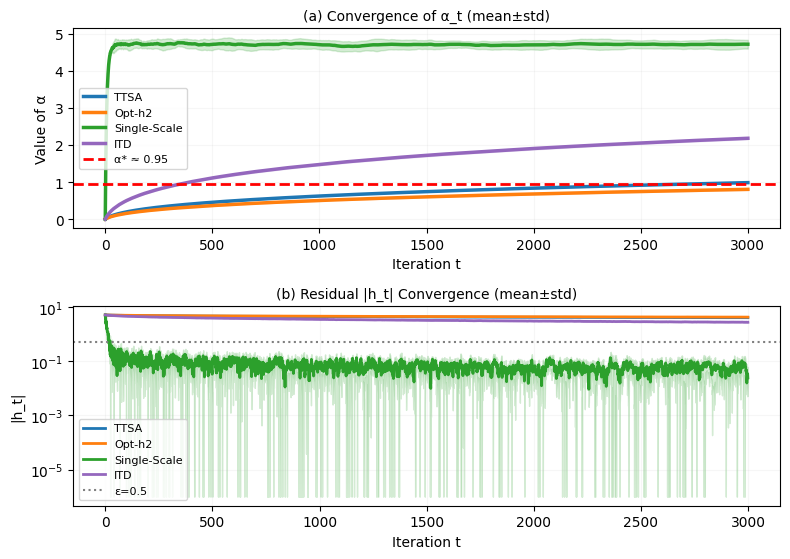


生成 Figure 1(c-d)...


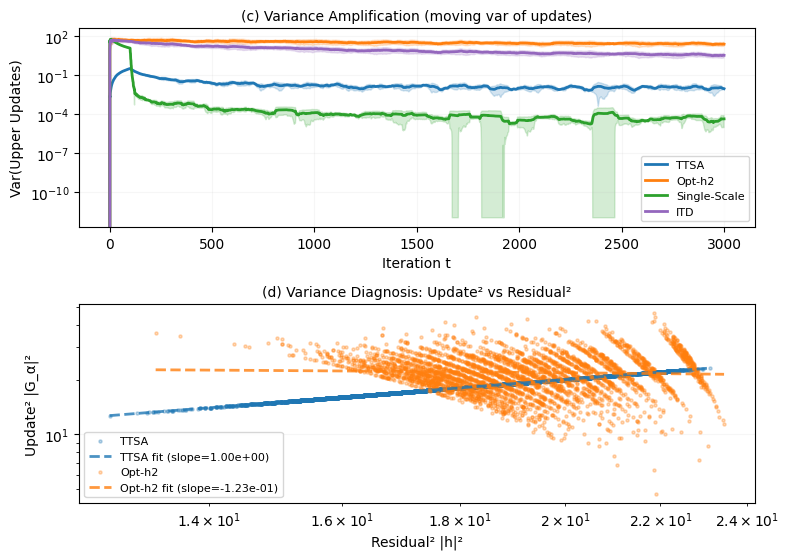


Table 1: Synthetic Quadratic RF-BO Results Summary
      Method |α_final - α*| Iter to ε Var_upper Var_ratio     Slope p-value vs TTSA
        TTSA  0.0192±0.0096    3000±0  1.63e+01      1.00  1.00e+00             N/A
      Opt-h2  0.1630±0.0290    3000±0  2.03e+01      1.15 -5.21e-02           0.000
Single-Scale  3.7480±0.1084      16±2  5.16e-03      1.00       N/A           0.000
         ITD  1.2136±0.0364    3000±0  9.05e+00      1.14       N/A           0.000

实验完成！Figure 1(a-b), 1(c-d) 和 Table 1 (含p-value) 已生成。


In [11]:
#第一个实验的版本2：这个版本是专为附录设计
#相比于版本1，版本2增加了p值计算以及 ITD方法的比较
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# =============================================================================
# 1. 实验设置 (Experiment Setup)
# =============================================================================
# 多seed设置
NUM_SEEDS = 5
SEEDS = [80, 93, 1, 11, 3, 7, 24, 1024, 10, 20, 27, 39, 69, 94, 63, 14, 66, 76, 58, 77, 83, 81, 67, 60, 70, 88, 72, 78, 99, 92, 96, 17, 21, 16, 34, 26, 8, 28, 12, 40, 32, 25, 37, 4, 31, 9, 18, 15][:NUM_SEEDS]

# 定义模型和数据参数
d = 10
N = 1000
C = 5.0
lambda_reg = 0.1
kappa = 0.001  # 降低二次项系数以提高数值稳定性

# 定义训练参数
T = 3000
batch_size = 128
alpha_init = 0.0
theta_init = np.zeros(d)
K_unroll = 10  # --- NEW: ITD方法的展开步数 ---

# probe 设置
probe_every = 200
K_probe = 50

# 收敛阈值（用于计算 iterations to ε）
epsilon = 0.5

# =============================================================================
# 2. 辅助函数：计算 theta^*(\alpha)
# =============================================================================
def compute_theta_star(alpha, X_data, lambda_reg, kappa, max_iter=100, tol=1e-6):
    theta = np.zeros(d)
    for _ in range(max_iter):
        residuals = X_data @ theta - alpha
        grad = (X_data.T @ residuals) / N + lambda_reg * theta + 4 * kappa * (theta**3)
        # 梯度裁剪
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 10.0:
            grad = grad / grad_norm * 10.0
        theta_new = theta - 0.005 * grad  # 更小的固定步长
        if np.linalg.norm(theta_new - theta) < tol:
            break
        theta = theta_new
    return theta

# =============================================================================
# 3. 运行单个seed的函数
# =============================================================================
def run_single_seed(seed):
    np.random.seed(seed)

    # 生成数据：降低协方差矩阵条件数
    theta_true = np.random.randn(d)
    theta_true[0] += 3.0
    cov = np.diag([5.0] + [1.0] * (d-1))  # 适度病态协方差
    X_data = np.random.multivariate_normal([3.0] + [0.0] * (d-1), cov, N) + np.random.normal(0, 0.2, (N, d))

    # 计算真实解
    A_true = (X_data.T @ X_data / N) + lambda_reg * np.eye(d)
    b_true = np.mean(X_data, axis=0)
    A_inv_true = np.linalg.inv(A_true)
    alpha_star_guess = 5.0
    theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
    denominator = theta_true.T @ theta_star
    if abs(denominator) < 1e-10:
        theta_true = np.random.randn(d) + np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
        denominator = theta_true.T @ theta_star
    alpha_star = C / denominator

    # 初始化
    methods = ['TTSA', 'Opt-h2', 'Single-Scale', 'ITD'] # --- MODIFIED: 添加ITD ---
    thetas = {m: theta_init.copy() for m in methods}
    alphas = {m: alpha_init for m in methods}

    history = {
        'alpha': {m: [alpha_init] for m in methods},
        'h_sq': {m: [] for m in methods},
        'update_norm_sq': {m: [] for m in methods},
        'h_values': {m: [] for m in methods},
        'probe': {},
        'converge_iter': {m: None for m in methods}
    }


    # 主循环
    for t in range(1, T + 1):
        eta_t = 0.5 / (t + 10)**0.5


        #########################消融实验只做这个###########################
        gamma_base_TTSA = 0.004
        gamma_t = gamma_base_TTSA / (t + 10)**0.6


        gamma_base_opth2_fixed = 0.003
        gamma_t_opth2_fixed = gamma_base_opth2_fixed / (t + 10)**0.6

        gamma_base_ITD_base = 0.01
        gamma_base_ITD = gamma_base_ITD_base / (t + 10)**0.6

        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_data[indices]

        # --- MODIFIED: 为ITD分配学习率 ---
        step_sizes = {'TTSA': gamma_t,
                      'Opt-h2': gamma_t_opth2_fixed,
                      'Single-Scale': eta_t,
                      'ITD': gamma_base_ITD}

        for method in methods:

            # 更新 theta
            residuals = X_batch @ thetas[method] - alphas[method]
            grad_theta = (X_batch.T @ residuals) / batch_size + lambda_reg * thetas[method] + 4 * kappa * (thetas[method]**3)
            # 梯度裁剪
            grad_norm = np.linalg.norm(grad_theta)
            if grad_norm > 10.0:
                grad_theta = grad_theta / grad_norm * 10.0
            thetas[method] -= eta_t * grad_theta

            # 计算 h_t
            h_t = theta_true.T @ thetas[method] - C

            # 更新 alpha
            update_direction = 0
            if method == 'TTSA' or method == 'Single-Scale':
                update_direction = h_t
            elif method == 'Opt-h2':
                A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
                b_batch = np.mean(X_batch, axis=0)
                try:
                    A_batch_inv = np.linalg.inv(A_batch)
                    jacobian_approx = A_batch_inv @ b_batch
                    nabla_alpha_h = theta_true.T @ jacobian_approx
                    update_direction = h_t * nabla_alpha_h
                except np.linalg.LinAlgError:
                    update_direction = h_t

            # --- NEW: ITD方法的更新逻辑 ---
            elif method == 'ITD':
                # 1. 创建虚拟theta用于前向模拟
                theta_virtual = thetas[method].copy()

                # 2. 前向模拟K步theta的更新
                for _ in range(K_unroll):
                    residuals_virtual = X_batch @ theta_virtual - alphas[method]
                    grad_theta_virtual = (X_batch.T @ residuals_virtual) / batch_size + lambda_reg * theta_virtual + 4 * kappa * (theta_virtual**3)

                    # 同样进行梯度裁剪
                    grad_norm_virtual = np.linalg.norm(grad_theta_virtual)
                    if grad_norm_virtual > 10.0:
                        grad_theta_virtual = grad_theta_virtual / grad_norm_virtual * 10.0

                    theta_virtual = theta_virtual - eta_t * grad_theta_virtual

                # 3. 计算K步之后的 h_K
                h_K = theta_true.T @ theta_virtual - C

                # 4. 计算更新方向, 使用h_K和Jacobian近似
                A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
                b_batch = np.mean(X_batch, axis=0)
                try:
                    A_batch_inv = np.linalg.inv(A_batch)
                    jacobian_approx = A_batch_inv @ b_batch
                    nabla_alpha_h = theta_true.T @ jacobian_approx
                    update_direction = h_K * nabla_alpha_h
                except np.linalg.LinAlgError:
                    update_direction = h_K # Fallback
            # --- ITD 逻辑结束 ---

            alphas[method] -= step_sizes[method] * update_direction

            # 记录
            history['alpha'][method].append(alphas[method])
            history['h_sq'][method].append(h_t**2)
            history['h_values'][method].append(h_t)
            history['update_norm_sq'][method].append(update_direction**2)

            # 检查收敛
            if history['converge_iter'][method] is None and abs(h_t) < epsilon:
                history['converge_iter'][method] = t

        # probe sampling
        if t % probe_every == 0:
            for method in ['TTSA', 'Opt-h2']: # ITD的probe比较复杂，暂时不加入
                h_s, g_ttsa, g_opth2 = sample_G_alpha(alphas[method], theta_true, X_data, N, d, lambda_reg, K_probe, batch_size)
                if method not in history['probe']:
                    history['probe'][method] = {'mean_h_sq': [], 'var_g': [], 'h_sq_vals': [], 'update_sq_vals': []}
                history['probe'][method]['mean_h_sq'].append(np.mean(h_s**2))
                if method == 'TTSA':
                    history['probe'][method]['var_g'].append(np.var(g_ttsa))
                    history['probe'][method]['h_sq_vals'].extend(h_s**2)
                    history['probe'][method]['update_sq_vals'].extend(g_ttsa**2)
                else:
                    history['probe'][method]['var_g'].append(np.var(g_opth2))
                    history['probe'][method]['h_sq_vals'].extend(h_s**2)
                    history['probe'][method]['update_sq_vals'].extend(g_opth2**2)

    # 输出每个种子的估计情况
    print(f"\n种子 {seed} 的估计情况：")
    for method in methods:
        final_alpha = history['alpha'][method][-1]
        error = abs(final_alpha - alpha_star) if not np.isnan(final_alpha) else np.inf
        converge_iter = history['converge_iter'][method] if history['converge_iter'][method] is not None else T
        print(f"  {method}:")
        print(f"    α* = {alpha_star:.4f}")
        print(f"    α_final = {final_alpha:.4f}")
        print(f"    |α_final - α*| = {error:.4f}")
        print(f"    Iter to ε = {converge_iter}")

    return history, alpha_star, theta_true, X_data

def sample_G_alpha(alpha_val, theta_true, X_data, N, d, lambda_reg, K, batch_size):
    h_s = np.zeros(K)
    g_ttsa = np.zeros(K)
    g_opth2 = np.zeros(K)
    for k in range(K):
        idx = np.random.choice(N, batch_size, replace=False)
        Xb = X_data[idx]
        A_b = (Xb.T @ Xb) / batch_size + lambda_reg * np.eye(d)
        b_b = np.mean(Xb, axis=0)
        try:
            A_b_inv = np.linalg.inv(A_b)
        except np.linalg.LinAlgError:
            A_b_inv = np.linalg.pinv(A_b)
        jac = A_b_inv @ b_b
        theta_star_b = jac * alpha_val
        h_b = theta_true.T @ theta_star_b - C
        h_s[k] = h_b
        g_ttsa[k] = h_b
        g_opth2[k] = h_b * (theta_true.T @ jac)
    return h_s, g_ttsa, g_opth2


def plot_appendix_consistency_figure(all_results):
    """
    为附录生成一张简洁的图，用于展示每种方法在所有随机种子下的一致性。
    """
    print("\n正在为附录生成补充图 (跨种子一致性分析)...")

    methods = ['TTSA', 'Opt-h2', 'Single-Scale', 'ITD'] # --- MODIFIED: 添加ITD ---
    colors = {'TTSA': '#1f77b4', 'Opt-h2': '#ff7f0e', 'Single-Scale': '#2ca02c', 'ITD': '#9467bd'} # --- MODIFIED: 添加ITD颜色 ---

    # 创建一个1行4列的图，分别对应四种方法
    fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=True) # --- MODIFIED: 调整图布局 ---
    fig.suptitle('Supplementary Figure: Cross-Seed Consistency of α_t Convergence', fontsize=16, y=1.03)

    for i, method in enumerate(methods):
        ax = axes[i]

        # 绘制当前方法下所有随机种子的收敛曲线
        for result in all_results:
            alpha_traj = result['history']['alpha'][method]
            # 使用方法的统一颜色，但通过透明度来显示曲线密度
            ax.plot(alpha_traj, color=colors[method], alpha=0.5, linewidth=1.5)

        # 计算并绘制平均曲线，使其更突出
        alpha_trajs = [res['history']['alpha'][method] for res in all_results]
        min_len = min(len(t) for t in alpha_trajs)
        alpha_trajs_trimmed = [np.array(t[:min_len]) for t in alpha_trajs]
        alpha_mean = np.nanmean(alpha_trajs_trimmed, axis=0)
        ax.plot(alpha_mean, color='black', linewidth=2.5, linestyle='--', label='Mean Trajectory')

        # 添加真实解 alpha* 的参考线
        alpha_star_ref = np.mean([res['alpha_star'] for res in all_results])
        ax.axhline(alpha_star_ref, color='red', linestyle=':', linewidth=2, label=f'Avg. α* ≈ {alpha_star_ref:.2f}')

        ax.set_title(f'Method: {method}')
        ax.set_xlabel('Iteration t')
        if i == 0:
            ax.set_ylabel('Value of α')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('supplementary_consistency_plot.eps', format='eps')
    plt.show()

    print("\n已生成简洁的附录补充图。")

def calculate_p_values(final_errors_dict, methods_list, baseline_method='TTSA'):
    """
    计算并返回一个字典，包含每种方法与基准方法相比的 p-value。
    """
    p_values = {}

    # 提取基准方法的误差数据
    baseline_errors = final_errors_dict.get(baseline_method)
    if baseline_errors is None or len(baseline_errors) < 2:
        print(f"Warning: Baseline method '{baseline_method}' has insufficient data for p-value calculation.")
        return {m: 'N/A' for m in methods_list}

    for method in methods_list:
        if method == baseline_method:
            p_values[method] = 'N/A'  # 基准方法与自身比较无意义
            continue

        method_errors = final_errors_dict.get(method)
        if method_errors is None or len(method_errors) < 2:
            p_values[method] = 'N/A'
            continue

        # 使用独立样本t检验计算p-value
        # `equal_var=False` 执行 Welch's t-test，对两组方差不同时更稳健
        t_stat, p_val = stats.ttest_ind(method_errors, baseline_errors, equal_var=False, nan_policy='omit')

        p_values[method] = f"{p_val:.3f}"

    return p_values


# =============================================================================
# 4. 运行多个seed并聚合结果
# =============================================================================
print("开始多seed实验...")
all_results = []
methods = ['TTSA', 'Opt-h2', 'Single-Scale', 'ITD'] # --- MODIFIED: 添加ITD ---

for i, seed in enumerate(SEEDS):
    print(f"\n运行 Seed {i+1}/{NUM_SEEDS} (seed={seed})...")
    history, alpha_star, theta_true, X_data = run_single_seed(seed)
    all_results.append({
        'seed': seed,
        'history': history,
        'alpha_star': alpha_star
    })
    print(f"  Seed {seed} 完成. α*={alpha_star:.4f}")

print("\n所有seed实验完成！")

# =============================================================================
# 5. 聚合统计数据
# =============================================================================
final_errors = {m: [] for m in methods}
converge_iters = {m: [] for m in methods}
final_var_upper = {m: [] for m in methods}
var_ratios = {m: [] for m in methods}
slopes = {m: [] for m in methods}

for result in all_results:
    history = result['history']
    alpha_star = result['alpha_star']

    for method in methods:
        final_alpha = history['alpha'][method][-1]
        # 处理 nan 值
        if np.isnan(final_alpha):
            final_errors[method].append(np.inf)
        else:
            final_errors[method].append(abs(final_alpha - alpha_star))

        if history['converge_iter'][method] is None:
            converge_iters[method].append(T)
        else:
            converge_iters[method].append(history['converge_iter'][method])

        last_1000_updates = history['update_norm_sq'][method][-1000:]
        # 处理 nan 值
        if np.any(np.isnan(last_1000_updates)):
            final_var_upper[method].append(np.nan)
        else:
            final_var_upper[method].append(np.mean(last_1000_updates))

        last_1000_h_sq = history['h_sq'][method][-1000:]
        var_ratio = np.mean(last_1000_updates) / (np.mean(last_1000_h_sq) + 1e-10) if not np.any(np.isnan(last_1000_updates)) else np.nan
        var_ratios[method].append(var_ratio)

        # probe部分暂时不为ITD添加，保持原样
        if method in ['TTSA', 'Opt-h2'] and method in history['probe']:
            h_sq_vals = np.array(history['probe'][method]['h_sq_vals'])
            update_sq_vals = np.array(history['probe'][method]['update_sq_vals'])
            if len(h_sq_vals) > 10 and not np.any(np.isnan(h_sq_vals)) and not np.any(np.isnan(update_sq_vals)):
                slope, _, _, _, _ = stats.linregress(h_sq_vals, update_sq_vals)
                slopes[method].append(slope)
            else:
                slopes[method].append(np.nan)
        else:
            slopes[method].append(np.nan)

# =============================================================================
# 6. 生成 Figure 1 (2×1 布局，两个独立图)
# =============================================================================
print("\n生成 Figure 1(a-b)...")
fig1 = plt.figure(figsize=(8, 6))

colors = {'TTSA': '#1f77b4', 'Opt-h2': '#ff7f0e', 'Single-Scale': '#2ca02c', 'ITD': '#9467bd'} # --- MODIFIED: 添加ITD颜色 ---

# (a) α_t 轨迹：mean ± std
ax1a = plt.subplot(2, 1, 1)
for method in methods:
    alpha_trajs = [res['history']['alpha'][method] for res in all_results]
    min_len = min(len(t) for t in alpha_trajs)
    alpha_trajs_trimmed = [t[:min_len] for t in alpha_trajs]
    alpha_mean = np.nanmean(alpha_trajs_trimmed, axis=0)
    alpha_std = np.nanstd(alpha_trajs_trimmed, axis=0)

    iters = np.arange(len(alpha_mean))
    ax1a.plot(iters, alpha_mean, label=method, lw=2.5, color=colors[method])
    ax1a.fill_between(iters, alpha_mean - alpha_std, alpha_mean + alpha_std,
                      color=colors[method], alpha=0.2)

alpha_star_ref = all_results[0]['alpha_star']
ax1a.axhline(alpha_star_ref, color='red', linestyle='--', linewidth=2,
            label=f'α* ≈ {alpha_star_ref:.2f}')
ax1a.set_title('(a) Convergence of α_t (mean±std)', fontsize=10)
ax1a.set_xlabel('Iteration t', fontsize=10)
ax1a.set_ylabel('Value of α', fontsize=10)
ax1a.legend(fontsize=8)
ax1a.grid(True, alpha=0.1)

# (b) |h_t| 残差收敛 (log scale)
ax1b = plt.subplot(2, 1, 2)
for method in methods:
    h_trajs = [np.abs(res['history']['h_values'][method]) for res in all_results]
    min_len = min(len(t) for t in h_trajs)
    h_trajs_trimmed = [t[:min_len] for t in h_trajs]
    h_mean = np.nanmean(h_trajs_trimmed, axis=0)
    h_std = np.nanstd(h_trajs_trimmed, axis=0)

    iters = np.arange(len(h_mean))
    ax1b.plot(iters, h_mean, label=method, lw=2, color=colors[method])
    ax1b.fill_between(iters, np.maximum(h_mean - h_std, 1e-6), h_mean + h_std,
                      color=colors[method], alpha=0.2)

ax1b.axhline(epsilon, color='gray', linestyle=':', linewidth=1.5, label=f'ε={epsilon}')
ax1b.set_title('(b) Residual |h_t| Convergence (mean±std)', fontsize=10)
ax1b.set_xlabel('Iteration t', fontsize=10)
ax1b.set_ylabel('|h_t|', fontsize=10)
ax1b.set_yscale('log')
ax1b.legend(fontsize=8)
ax1b.grid(True, alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('convergence_trajectory.eps', format='eps')
plt.show()

print("\n生成 Figure 1(c-d)...")
fig2 = plt.figure(figsize=(8, 6))

# (c) Moving Variance of Upper-level Updates
ax2c = plt.subplot(2, 1, 1)
window = 100
for method in methods:
    update_trajs = [res['history']['update_norm_sq'][method] for res in all_results]
    min_len = min(len(t) for t in update_trajs)
    update_trajs_trimmed = [t[:min_len] for t in update_trajs]

    all_moving_vars = []
    for traj in update_trajs_trimmed:
        if len(traj) >= window and not np.any(np.isnan(traj)):
            moving_var = [np.var(traj[max(0, i-window):i+1]) for i in range(len(traj))]
            all_moving_vars.append(moving_var)

    if all_moving_vars:
        moving_var_mean = np.nanmean(all_moving_vars, axis=0)
        moving_var_std = np.nanstd(all_moving_vars, axis=0)
        iters = np.arange(len(moving_var_mean))
        ax2c.plot(iters, moving_var_mean, label=method, lw=2, color=colors[method])
        ax2c.fill_between(iters, np.maximum(moving_var_mean - moving_var_std, 1e-12),
                          moving_var_mean + moving_var_std, color=colors[method], alpha=0.2)

ax2c.set_title('(c) Variance Amplification (moving var of updates)', fontsize=10)
ax2c.set_xlabel('Iteration t', fontsize=10)
ax2c.set_ylabel('Var(Upper Updates)', fontsize=10)
ax2c.set_yscale('log')
ax2c.legend(fontsize=8)
ax2c.grid(True, alpha=0.1)

# (d) 散点图: update² vs residual² (诊断 Proposition)
ax2d = plt.subplot(2, 1, 2)
for method in ['TTSA', 'Opt-h2']: # 保持原样，暂时不画ITD的散点图
    all_h_sq = []
    all_update_sq = []
    for result in all_results:
        if method in result['history']['probe']:
            all_h_sq.extend(result['history']['probe'][method]['h_sq_vals'])
            all_update_sq.extend(result['history']['probe'][method]['update_sq_vals'])

    if len(all_h_sq) > 0 and not np.any(np.isnan(all_h_sq)) and not np.any(np.isnan(all_update_sq)):
        ax2d.scatter(all_h_sq, all_update_sq, alpha=0.3, s=5, color=colors[method], label=method)

        if len(all_h_sq) > 10:
            slope, intercept, r_value, _, _ = stats.linregress(all_h_sq, all_update_sq)
            x_fit = np.linspace(min(all_h_sq), max(all_h_sq), 100)
            ax2d.plot(x_fit, slope*x_fit + intercept, color=colors[method],
                      linestyle='--', lw=2, alpha=0.8,
                      label=f'{method} fit (slope={slope:.2e})')

ax2d.set_title('(d) Variance Diagnosis: Update² vs Residual²', fontsize=10)
ax2d.set_xlabel('Residual² |h|²', fontsize=10)
ax2d.set_ylabel('Update² |G_α|²', fontsize=10)
ax2d.set_xscale('log')
ax2d.set_yscale('log')
ax2d.legend(fontsize=8)
ax2d.grid(True, alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('variance_residual.eps', format='eps')
plt.show()

# =============================================================================
# 7. 生成 Table 1
# =============================================================================
print("\n" + "="*80)
print("Table 1: Synthetic Quadratic RF-BO Results Summary")
print("="*80)

# --- 新增步骤1: 调用函数计算 p-value ---
p_values = calculate_p_values(final_errors, methods)

table_data = []
for method in methods:
    row = {
        'Method': method,
        '|α_final - α*|': f"{np.nanmean(final_errors[method]):.4f}±{np.nanstd(final_errors[method]):.4f}",
        'Iter to ε': f"{np.nanmean(converge_iters[method]):.0f}±{np.nanstd(converge_iters[method]):.0f}",
        'Var_upper': f"{np.nanmean(final_var_upper[method]):.2e}",
        'Var_ratio': f"{np.nanmean(var_ratios[method]):.2f}",
        'Slope': f"{np.nanmean(slopes[method]):.2e}" if not all(np.isnan(slopes[method])) else "N/A",
        # --- 新增步骤2: 在字典中加入 p-value ---
        'p-value vs TTSA': p_values[method]
    }
    table_data.append(row)

df_table = pd.DataFrame(table_data)
print(df_table.to_string(index=False))
print("="*80)

print("\n实验完成！Figure 1(a-b), 1(c-d) 和 Table 1 (含p-value) 已生成。")

In [7]:
#实验1的第三个代码块：超参数网络探索ITD的最佳超参数
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import itertools

# =============================================================================
# 1. 实验设置 (Experiment Setup)
# =============================================================================
# --- 基本设置 ---
NUM_SEEDS = 5
SEEDS = [80, 93, 1, 11, 3]
d = 10
N = 1000
C = 5.0
lambda_reg = 0.1
kappa = 0.001
T = 3000
batch_size = 128
alpha_init = 0.0
theta_init = np.zeros(d)

# --- ITD 调优参数空间 ---
ITD_K_UNROLL_SPACE = [3]
ITD_GAMMA_BASE_SPACE = [0.010,0.007, 0.005,0.004, 0.0035,0.003,0.002, 0.001]

# =============================================================================
# 2. 辅助函数 (不变)
# =============================================================================
def compute_theta_star(alpha, X_data, lambda_reg, kappa, max_iter=100, tol=1e-6):
    theta = np.zeros(d)
    for _ in range(max_iter):
        residuals = X_data @ theta - alpha
        grad = (X_data.T @ residuals) / N + lambda_reg * theta + 4 * kappa * (theta**3)
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 10.0:
            grad = grad / grad_norm * 10.0
        theta_new = theta - 0.005 * grad
        if np.linalg.norm(theta_new - theta) < tol:
            break
        theta = theta_new
    return theta

# =============================================================================
# 3. 运行函数 (修改为只跑ITD并接受参数)
# =============================================================================
def run_itd_for_tuning(seed, k_unroll, gamma_base):
    np.random.seed(seed)

    # --- 数据生成和真实解计算 (不变) ---
    theta_true = np.random.randn(d); theta_true[0] += 3.0
    cov = np.diag([5.0] + [1.0] * (d-1)); X_data = np.random.multivariate_normal([3.0] + [0.0] * (d-1), cov, N) + np.random.normal(0, 0.2, (N, d))
    alpha_star_guess = 5.0; theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
    denominator = theta_true.T @ theta_star
    if abs(denominator) < 1e-10:
        theta_true = np.random.randn(d) + np.ones(d); theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
        denominator = theta_true.T @ theta_star
    alpha_star = C / denominator

    # --- 初始化 (只为ITD) ---
    theta = theta_init.copy()
    alpha = alpha_init

    # --- 主循环 ---
    for t in range(1, T + 1):
        eta_t = 0.5 / (t + 10)**0.5
        gamma_t = gamma_base / (t + 10)**0.6

        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_data[indices]

        # --- Theta Update ---
        residuals = X_batch @ theta - alpha
        grad_theta = (X_batch.T @ residuals) / batch_size + lambda_reg * theta + 4 * kappa * (theta**3)
        grad_norm = np.linalg.norm(grad_theta)
        if grad_norm > 10.0: grad_theta = grad_theta / grad_norm * 10.0
        theta -= eta_t * grad_theta

        # --- Alpha Update (ITD Logic) ---
        # *** 核心修正：使用传入的 k_unroll 参数 ***
        theta_virtual = theta.copy()
        for _ in range(k_unroll): # <-- 这里使用了正确的、从外部传入的k值
            residuals_virtual = X_batch @ theta_virtual - alpha
            grad_theta_virtual = (X_batch.T @ residuals_virtual) / batch_size + lambda_reg * theta_virtual + 4 * kappa * (theta_virtual**3)
            grad_norm_virtual = np.linalg.norm(grad_theta_virtual)
            if grad_norm_virtual > 10.0: grad_theta_virtual = grad_theta_virtual / grad_norm_virtual * 10.0
            theta_virtual -= eta_t * grad_theta_virtual
        h_K = theta_true.T @ theta_virtual - C

        update_direction = h_K # Fallback
        A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
        b_batch = np.mean(X_batch, axis=0)
        try:
            A_batch_inv = np.linalg.inv(A_batch)
            jacobian_approx = A_batch_inv @ b_batch
            nabla_alpha_h = theta_true.T @ jacobian_approx
            update_direction = h_K * nabla_alpha_h
        except np.linalg.LinAlgError:
            pass

        alpha -= gamma_t * update_direction

    return abs(alpha - alpha_star)

# =============================================================================
# 4. 主程序：进行网格搜索
# =============================================================================
if __name__ == "__main__":

    all_tuning_results = []

    search_space = list(itertools.product(ITD_K_UNROLL_SPACE, ITD_GAMMA_BASE_SPACE))
    print(f"Starting ITD Grid Search for {len(search_space)} hyperparameter combinations...")
    print("-" * 60)

    for k_unroll, gamma_base in search_space:
        print(f"-> Testing: K_unroll = {k_unroll}, gamma_base = {gamma_base}")

        seed_errors = []
        for seed in SEEDS:
            final_error = run_itd_for_tuning(seed, k_unroll=k_unroll, gamma_base=gamma_base)
            seed_errors.append(final_error)

        mean_error = np.mean(seed_errors)
        all_tuning_results.append({
            'K_unroll': k_unroll,
            'gamma_base': gamma_base,
            'mean_error': mean_error
        })
        print(f"  Mean Error over {NUM_SEEDS} seeds: {mean_error:.4f}")

    # --- 打印最终的汇总表格 ---
    print("\n" + "="*80)
    print("Grid Search for ITD Completed. Results Summary:")
    print("="*80)

    df = pd.DataFrame(all_tuning_results)

    result_table = df.pivot(index='K_unroll', columns='gamma_base', values='mean_error')
    result_table = result_table.applymap(lambda x: f"{x:.4f}")

    print("Each cell reports the mean final error over 5 seeds.")
    print(result_table)
    print("\n" + "="*80)

    best_result_idx = df['mean_error'].idxmin()
    best_result = df.loc[best_result_idx]

    print(f"Optimal performance for ITD found at K_unroll = {int(best_result['K_unroll'])} and gamma_base = {best_result['gamma_base']}")
    print(f"With a minimum mean error of: {best_result['mean_error']:.4f}")

Starting ITD Grid Search for 8 hyperparameter combinations...
------------------------------------------------------------
-> Testing: K_unroll = 3, gamma_base = 0.01
  Mean Error over 5 seeds: 1.2157
-> Testing: K_unroll = 3, gamma_base = 0.007
  Mean Error over 5 seeds: 0.6975
-> Testing: K_unroll = 3, gamma_base = 0.005
  Mean Error over 5 seeds: 0.2940
-> Testing: K_unroll = 3, gamma_base = 0.004
  Mean Error over 5 seeds: 0.0725
-> Testing: K_unroll = 3, gamma_base = 0.0035
  Mean Error over 5 seeds: 0.0436
-> Testing: K_unroll = 3, gamma_base = 0.003
  Mean Error over 5 seeds: 0.1633
-> Testing: K_unroll = 3, gamma_base = 0.002
  Mean Error over 5 seeds: 0.4143
-> Testing: K_unroll = 3, gamma_base = 0.001
  Mean Error over 5 seeds: 0.6814

Grid Search for ITD Completed. Results Summary:
Each cell reports the mean final error over 5 seeds.
gamma_base  0.0010  0.0020  0.0030  0.0035  0.0040  0.0050  0.0070  0.0100
K_unroll                                                            

/tmp/ipython-input-1781279669.py:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_table = result_table.applymap(lambda x: f"{x:.4f}")


In [12]:
#第一个实验的第四个代码块：比较速度
#第一个实验，这是比较速度的
#内容：跑模拟并且绘制正文的图，在最后新增p-value计算和ITD对比
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import time # Make sure time is imported

# =============================================================================
# 1. 实验设置 (Experiment Setup)
# =============================================================================
# 多seed设置
# 多seed设置
NUM_SEEDS = 30
# 设置一个主种子，以确保每次随机选择的种子列表是相同的，保证实验的可复现性
np.random.seed(42)
# 从1到1000的范围内，无放回地随机抽取NUM_SEEDS个整数作为种子
SEEDS = np.random.choice(range(1, 1001), size=NUM_SEEDS, replace=False)

# 定义模型和数据参数
d = 10
N = 1000
C = 5.0
lambda_reg = 0.1
kappa = 0.001

# 定义训练参数
T = 3000
batch_size = 128
alpha_init = 0.0
theta_init = np.zeros(d)
K_unroll = 3 # Using the best K for ITD found from tuning

# 收敛阈值（用于计算 iterations to ε）
epsilon = 0.5

# =============================================================================
# 2. 辅助函数：计算 theta^*(\alpha)
# =============================================================================
def compute_theta_star(alpha, X_data, lambda_reg, kappa, max_iter=100, tol=1e-6):
    theta = np.zeros(d)
    for _ in range(max_iter):
        residuals = X_data @ theta - alpha
        grad = (X_data.T @ residuals) / N + lambda_reg * theta + 4 * kappa * (theta**3)
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 10.0:
            grad = grad / grad_norm * 10.0
        theta_new = theta - 0.005 * grad
        if np.linalg.norm(theta_new - theta) < tol:
            break
        theta = theta_new
    return theta

# =============================================================================
# 3. 运行单个seed的函数
# =============================================================================
def run_single_seed(seed):
    np.random.seed(seed)

    # --- Data Generation and True Solution ---
    theta_true = np.random.randn(d); theta_true[0] += 3.0
    cov = np.diag([5.0] + [1.0] * (d-1)); X_data = np.random.multivariate_normal([3.0] + [0.0] * (d-1), cov, N) + np.random.normal(0, 0.2, (N, d))
    alpha_star_guess = 5.0; theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
    denominator = theta_true.T @ theta_star
    if abs(denominator) < 1e-10:
        theta_true = np.random.randn(d) + np.ones(d); theta_star = compute_theta_star(alpha_star_guess, X_data, lambda_reg, kappa)
        denominator = theta_true.T @ theta_star
    alpha_star = C / denominator

    # --- Initialization ---
    methods = ['TTSA', 'Opt-h2', 'Single-Scale', 'ITD']
    thetas = {m: theta_init.copy() for m in methods}
    alphas = {m: alpha_init for m in methods}
    history = {
        'alpha': {m: [alpha_init] for m in methods},
        'h_sq': {m: [] for m in methods},
        'update_norm_sq': {m: [] for m in methods},
        'h_values': {m: [] for m in methods},
        'converge_iter': {m: None for m in methods}
    }
    iteration_times = {m: [] for m in methods}

    # --- Main Loop ---
    for t in range(1, T + 1):
        eta_t = 0.5 / (t + 10)**0.5

        # --- Using optimal hyperparameters for all methods ---
        gamma_t_ttsa = 0.004 / (t + 10)**0.6
        gamma_t_opth2 = 0.004 / (t + 10)**0.6
        gamma_t_itd = 0.0035 / (t + 10)**0.6

        step_sizes = {'TTSA': gamma_t_ttsa,
                      'Opt-h2': gamma_t_opth2,
                      'Single-Scale': eta_t,
                      'ITD': gamma_t_itd}

        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_data[indices]

        for method in methods:
            start_time = time.time() # --- Start timer ---

            # --- Theta Update ---
            residuals = X_batch @ thetas[method] - alphas[method]
            grad_theta = (X_batch.T @ residuals) / batch_size + lambda_reg * thetas[method] + 4 * kappa * (thetas[method]**3)
            grad_norm = np.linalg.norm(grad_theta)
            if grad_norm > 10.0: grad_theta = grad_theta / grad_norm * 10.0
            thetas[method] -= eta_t * grad_theta

            # --- h_t Calculation ---
            h_t = theta_true.T @ thetas[method] - C

            # --- Alpha Update ---
            update_direction = 0
            if method == 'TTSA' or method == 'Single-Scale':
                update_direction = h_t
            elif method == 'Opt-h2':
                A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
                b_batch = np.mean(X_batch, axis=0)
                try:
                    A_batch_inv = np.linalg.inv(A_batch)
                    jacobian_approx = A_batch_inv @ b_batch
                    nabla_alpha_h = theta_true.T @ jacobian_approx
                    update_direction = h_t * nabla_alpha_h
                except np.linalg.LinAlgError:
                    update_direction = h_t
            elif method == 'ITD':
                theta_virtual = thetas[method].copy()
                for _ in range(K_unroll):
                    residuals_virtual = X_batch @ theta_virtual - alphas[method]
                    grad_theta_virtual = (X_batch.T @ residuals_virtual) / batch_size + lambda_reg * theta_virtual + 4 * kappa * (theta_virtual**3)
                    grad_norm_virtual = np.linalg.norm(grad_theta_virtual)
                    if grad_norm_virtual > 10.0: grad_theta_virtual = grad_theta_virtual / grad_norm_virtual * 10.0
                    theta_virtual -= eta_t * grad_theta_virtual
                h_K = theta_true.T @ theta_virtual - C
                A_batch = (X_batch.T @ X_batch / batch_size) + lambda_reg * np.eye(d)
                b_batch = np.mean(X_batch, axis=0)
                try:
                    A_batch_inv = np.linalg.inv(A_batch)
                    jacobian_approx = A_batch_inv @ b_batch
                    nabla_alpha_h = theta_true.T @ jacobian_approx
                    update_direction = h_K * nabla_alpha_h
                except np.linalg.LinAlgError:
                    update_direction = h_K

            alphas[method] -= step_sizes[method] * update_direction

            end_time = time.time() # --- End timer ---
            iteration_times[method].append(end_time - start_time)

            # --- Record History ---
            history['alpha'][method].append(alphas[method])
            history['h_sq'][method].append(h_t**2)
            history['h_values'][method].append(h_t)
            history['update_norm_sq'][method].append(update_direction**2)
            if history['converge_iter'][method] is None and abs(h_t) < epsilon:
                history['converge_iter'][method] = t

    # --- Calculate average times and return ---
    avg_iter_times = {m: np.mean(iteration_times[m]) * 1000 for m in methods}
    return history, alpha_star, theta_true, X_data, avg_iter_times

def calculate_p_values(final_errors_dict, methods_list, baseline_method='TTSA'):
    p_values = {}
    baseline_errors = final_errors_dict.get(baseline_method)
    if baseline_errors is None: return {m: 'N/A' for m in methods_list}
    for method in methods_list:
        if method == baseline_method: p_values[method] = 'N/A'; continue
        method_errors = final_errors_dict.get(method)
        if method_errors is None: p_values[method] = 'N/A'; continue
        _, p_val = stats.ttest_ind(method_errors, baseline_errors, equal_var=False, nan_policy='omit')
        p_values[method] = f"{p_val:.3f}" if p_val >= 0.001 else "<0.001"
    return p_values

# =============================================================================
# 4. 运行多个seed并聚合结果
# =============================================================================
print("开始多seed实验...")
all_results = []
methods = ['TTSA', 'Opt-h2', 'Single-Scale', 'ITD']

for i, seed in enumerate(SEEDS):
    print(f"\n运行 Seed {i+1}/{NUM_SEEDS} (seed={seed})...")
    # *** FIX IS HERE: Unpack 5 values instead of 4 ***
    history, alpha_star, theta_true, X_data, avg_iter_times = run_single_seed(seed)

    all_results.append({
        'seed': seed,
        'history': history,
        'alpha_star': alpha_star,
        'avg_iter_times': avg_iter_times # --- Store the new timing data ---
    })
    print(f"  Seed {seed} 完成. α*={alpha_star:.4f}")

print("\n所有seed实验完成！")

# =============================================================================
# 5. 聚合统计数据
# =============================================================================
final_errors = {m: [] for m in methods}
converge_iters = {m: [] for m in methods}
avg_times = {m: [] for m in methods} # --- New dict for timing data ---

for result in all_results:
    for method in methods:
        final_alpha = result['history']['alpha'][method][-1]
        final_errors[method].append(abs(final_alpha - result['alpha_star']))

        converge_iter = result['history']['converge_iter'][method]
        converge_iters[method].append(converge_iter if converge_iter is not None else T)

        # --- Aggregate the new timing data ---
        avg_times[method].append(result['avg_iter_times'][method])

# =============================================================================
# 6. 生成最终结果表格
# =============================================================================
print("\n" + "="*80)
print("Final Experiment Results Summary")
print("="*80)

p_values = calculate_p_values(final_errors, methods)
table_data = []

for method in methods:
    row = {
        'Method': method,
        '|α_final - α*|': f"{np.mean(final_errors[method]):.4f} ± {np.std(final_errors[method]):.4f}",
        'p-value vs TTSA': p_values[method],
        # --- Add timing data to the final table (mean ± std over seeds) ---
        'Avg. Time / Iter (ms)': f"{np.mean(avg_times[method]):.2f} ± {np.std(avg_times[method]):.2f}"
    }
    table_data.append(row)

df_table = pd.DataFrame(table_data)
print(df_table.to_string(index=False))
print("="*80)

开始多seed实验...

运行 Seed 1/30 (seed=522)...
  Seed 522 完成. α*=1.3887

运行 Seed 2/30 (seed=738)...
  Seed 738 完成. α*=2.6840

运行 Seed 3/30 (seed=741)...
  Seed 741 完成. α*=1.1745

运行 Seed 4/30 (seed=661)...
  Seed 661 完成. α*=1.5901

运行 Seed 5/30 (seed=412)...
  Seed 412 完成. α*=1.5585

运行 Seed 6/30 (seed=679)...
  Seed 679 完成. α*=1.1367

运行 Seed 7/30 (seed=627)...
  Seed 627 完成. α*=1.9268

运行 Seed 8/30 (seed=514)...
  Seed 514 完成. α*=1.2849

运行 Seed 9/30 (seed=860)...
  Seed 860 完成. α*=1.1186

运行 Seed 10/30 (seed=137)...
  Seed 137 完成. α*=1.2586

运行 Seed 11/30 (seed=812)...
  Seed 812 完成. α*=0.8363

运行 Seed 12/30 (seed=77)...
  Seed 77 完成. α*=1.4979

运行 Seed 13/30 (seed=637)...
  Seed 637 完成. α*=0.9130

运行 Seed 14/30 (seed=974)...
  Seed 974 完成. α*=2.4712

运行 Seed 15/30 (seed=939)...
  Seed 939 完成. α*=1.5673

运行 Seed 16/30 (seed=900)...
  Seed 900 完成. α*=3.8089

运行 Seed 17/30 (seed=281)...
  Seed 281 完成. α*=2.1798

运行 Seed 18/30 (seed=884)...
  Seed 884 完成. α*=0.9507

运行 Seed 19/30 (seed=762).

In [ ]:
#实验2


=== SAC温度调节对比实验 ===
环境: Pendulum-v1, 种子: [44, 47, 49, 50, 52], 总步数: 30000, 设备: cuda
状态维度: 3, 动作维度: 1
目标熵: -1.0
初始化 fixed 智能体，目标熵: -1.0
初始化 original 智能体，目标熵: -1.0
初始化 ttsa 智能体，目标熵: -1.0

--- 训练种子 44 ---
  步数:   2000 | Fixed-Temp 评估奖励: -1426.91 | 温度: 0.5000 | 熵: 0.5783
  步数:   2000 | Original-SAC 评估奖励: -1530.75 | 温度: 0.4712 | 熵: 0.5648
  步数:   2000 | TTSA 评估奖励: -1240.59 | 温度: 0.3676 | 熵: 0.5223
  步数:   4000 | Fixed-Temp 评估奖励:  -973.13 | 温度: 0.5000 | 熵: 0.1734
  步数:   4000 | Original-SAC 评估奖励:  -943.15 | 温度: 0.4244 | 熵: 0.0916
  步数:   4000 | TTSA 评估奖励: -1169.78 | 温度: 0.2517 | 熵: -0.1717
  步数:   6000 | Fixed-Temp 评估奖励:  -124.47 | 温度: 0.5000 | 熵: 0.1025
  步数:   6000 | Original-SAC 评估奖励:  -623.31 | 温度: 0.3869 | 熵: -0.0592
  步数:   6000 | TTSA 评估奖励:  -224.17 | 温度: 0.2092 | 熵: -0.3800
  步数:   8000 | Fixed-Temp 评估奖励:  -172.72 | 温度: 0.5000 | 熵: 0.1033
  步数:   8000 | Original-SAC 评估奖励:  -649.58 | 温度: 0.3507 | 熵: -0.0907
  步数:   8000 | TTSA 评估奖励:  -342.28 | 温度: 0.1836 | 熵: -0.5282
  步数:  10000 | F

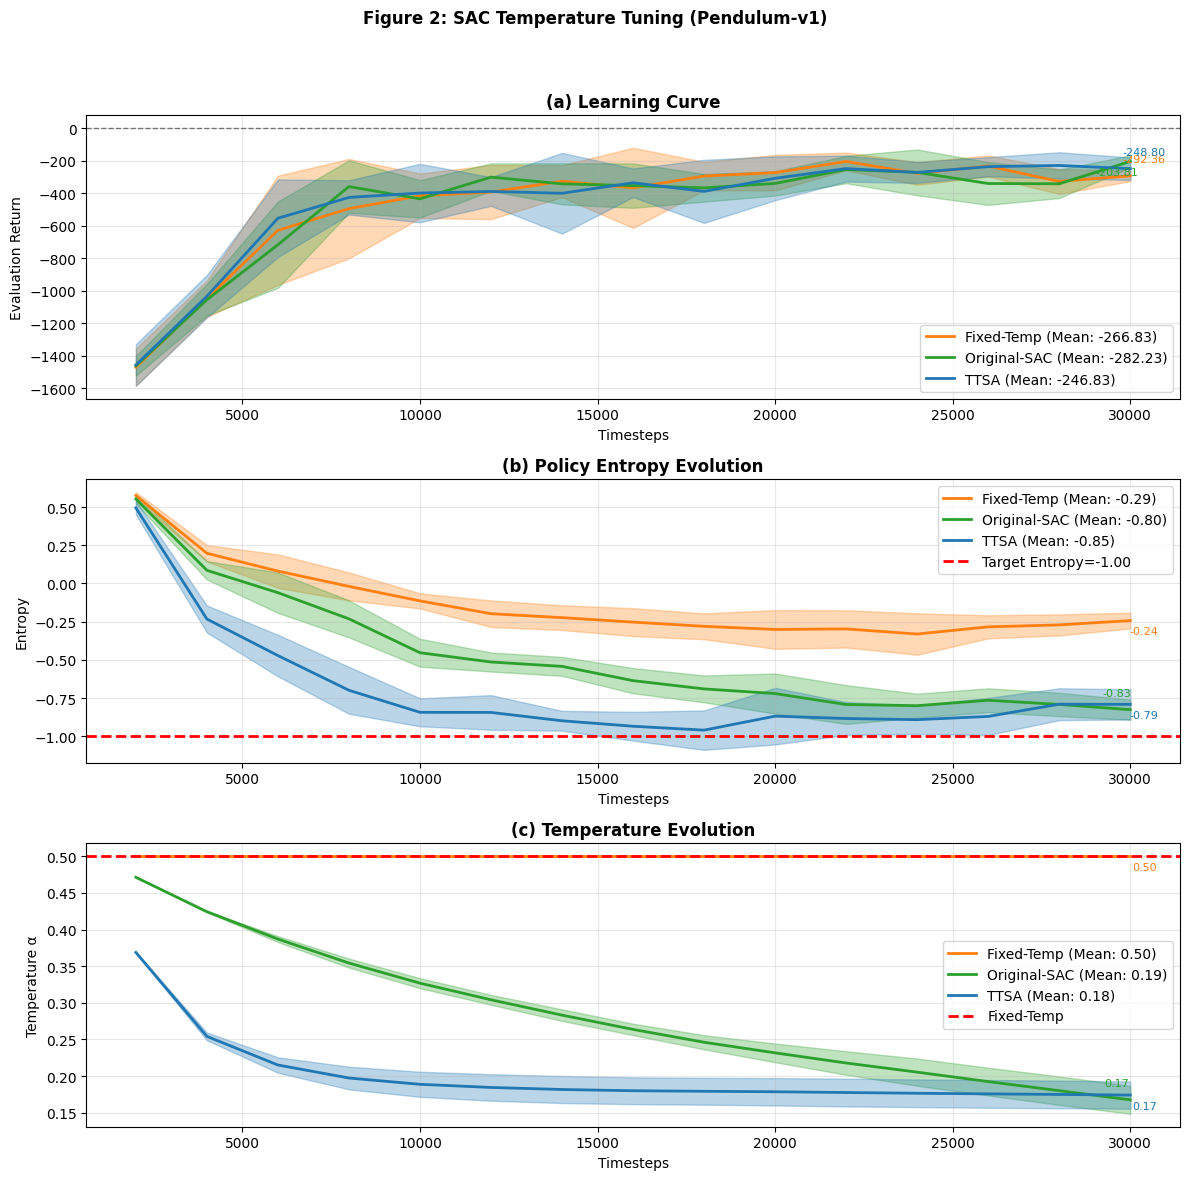


SAC温度调节实验结果总结

1. 实验设置:
   目标熵: -1
   对比方法: ['Fixed-Temp', 'Original-SAC', 'TTSA']

错误: list index out of range


Traceback (most recent call last):
  File "/tmp/ipython-input-521055988.py", line 610, in main
    print_experiment_summary(all_results, all_agents, target_entropy)
  File "/tmp/ipython-input-521055988.py", line 527, in print_experiment_summary
    r10k = np.mean([r for i, r in enumerate(eval_rewards) if eval_points[i] == 10000]) if 10000 in eval_points else np.nan
                                                             ~~~~~~~~~~~^^^
IndexError: list index out of range


In [1]:
#这是最终提交版本的版本
"""
SAC温度调节实验：TTSA vs 原始SAC vs 固定温度
完整实现SAC算法，专门对比不同的温度调节策略
[专家修正版] - 优化TTSA实现，确保实验的可靠性和理论正确性
"""
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import deque
import random
from typing import Tuple, Dict
import time
import os
import warnings
from scipy import stats
import pandas as pd

warnings.filterwarnings("ignore")

# 检查并安装必要的依赖
def check_dependencies():
    required_packages = ['gymnasium', 'torch', 'numpy', 'matplotlib', 'scipy']
    missing_packages = []
    for package in required_packages:
        try:
            __import__(package)
        except ImportError:
            missing_packages.append(package)
    if missing_packages:
        print(f"缺少依赖: {missing_packages}")
        print("请安装: pip install gymnasium[classic_control] torch numpy matplotlib scipy")
        return False
    return True

# 设置设备
def setup_device():
    if 'TPU_NAME' in os.environ:
        try:
            import torch_xla.core.xla_model as xm
            return xm.xla_device(), True
        except ImportError:
            print("TPU未安装")
    if torch.cuda.is_available():
        return torch.device("cuda"), False
    return torch.device("cpu"), False

if not check_dependencies():
    exit(1)

try:
    import gymnasium as gym
except ImportError:
    print("gymnasium未安装")
    exit(1)

device, is_tpu = setup_device()

def set_seed(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

class ReplayBuffer:
    def __init__(self, capacity: int, state_dim: int, action_dim: int):
        self.capacity = capacity
        self.size = 0
        self.ptr = 0
        self.states = np.zeros((capacity, state_dim), dtype=np.float32)
        self.actions = np.zeros((capacity, action_dim), dtype=np.float32)
        self.rewards = np.zeros((capacity, 1), dtype=np.float32)
        self.next_states = np.zeros((capacity, state_dim), dtype=np.float32)
        self.dones = np.zeros((capacity, 1), dtype=np.float32)
    def add(self, state, action, reward, next_state, done):
        self.states[self.ptr] = state
        self.actions[self.ptr] = action
        self.rewards[self.ptr] = reward
        self.next_states[self.ptr] = next_state
        self.dones[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)
    def sample(self, batch_size: int):
        indices = np.random.randint(0, self.size, batch_size)
        return (
            torch.FloatTensor(self.states[indices]).to(device),
            torch.FloatTensor(self.actions[indices]).to(device),
            torch.FloatTensor(self.rewards[indices]).to(device),
            torch.FloatTensor(self.next_states[indices]).to(device),
            torch.FloatTensor(self.dones[indices]).to(device)
        )

class Actor(nn.Module):
    def __init__(self, state_dim: int, action_dim: int, hidden_dim: int = 256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU()
        )
        self.mean_head = nn.Linear(hidden_dim, action_dim)
        self.log_std_head = nn.Linear(hidden_dim, action_dim)
        self.log_std_min = -20
        self.log_std_max = 2
        self.apply(self._init_weights)
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight)
            torch.nn.init.constant_(m.bias, 0)
    def forward(self, state):
        x = self.net(state)
        mean = self.mean_head(x)
        log_std = self.log_std_head(x)
        log_std = torch.clamp(log_std, self.log_std_min, self.log_std_max)
        return mean, log_std
    def sample(self, state):
        mean, log_std = self.forward(state)
        std = log_std.exp()
        normal = torch.distributions.Normal(mean, std)
        x_t = normal.rsample()
        action = torch.tanh(x_t)
        log_prob = normal.log_prob(x_t)
        log_prob -= torch.log(1 - action.pow(2) + 1e-7)
        log_prob = log_prob.sum(1, keepdim=True)
        return action, log_prob

class Critic(nn.Module):
    def __init__(self, state_dim: int, action_dim: int, hidden_dim: int = 256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        self.apply(self._init_weights)
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight)
            torch.nn.init.constant_(m.bias, 0)
    def forward(self, state, action):
        return self.net(torch.cat([state, action], dim=1))

class SACAgent:
    def __init__(self, state_dim: int, action_dim: int,
                temperature_mode: str = "fixed",
                target_entropy: float = None,
                initial_temperature: float = 0.5,
                lr: float = 3e-4):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.temperature_mode = temperature_mode
        self.target_entropy = target_entropy if target_entropy else -action_dim
        print(f"初始化 {temperature_mode} 智能体，目标熵: {self.target_entropy}")

        self.actor = Actor(state_dim, action_dim).to(device)
        self.critic1 = Critic(state_dim, action_dim).to(device)
        self.critic2 = Critic(state_dim, action_dim).to(device)
        self.target_critic1 = Critic(state_dim, action_dim).to(device)
        self.target_critic2 = Critic(state_dim, action_dim).to(device)

        self.target_critic1.load_state_dict(self.critic1.state_dict())
        self.target_critic2.load_state_dict(self.critic2.state_dict())

        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=lr)
        self.critic1_optimizer = optim.Adam(self.critic1.parameters(), lr=lr)
        self.critic2_optimizer = optim.Adam(self.critic2.parameters(), lr=lr)

        if temperature_mode == "fixed":
            self.temperature = initial_temperature
            self.log_temperature = None
            self.temperature_optimizer = None
        else:
            self.log_temperature = torch.log(torch.tensor(initial_temperature)).to(device).requires_grad_(True)
            self.temperature = self.log_temperature.exp().item()
            if temperature_mode == "original":
                self.temperature_optimizer = optim.Adam([self.log_temperature], lr=3e-4)

        if temperature_mode == "ttsa":
            self.ttsa_gamma_base = 1e-3  # 增加初始步长
            self.ttsa_step = 0
            self.temperature_optimizer = None
            self.h_ema = 0.0
            self.ema_alpha = 0.5  # 降低 EMA 平滑
            self.update_alpha_freq = 5

        self.temperature_history = [self.temperature]
        self.entropy_history = []
        self.h_values_history = []
        self.update_count = 0
        self.tau = 0.005
        self.gamma = 0.99

    def select_action(self, state, eval_mode=False):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        with torch.no_grad():
            if eval_mode:
                mean, _ = self.actor(state)
                action = torch.tanh(mean)
            else:
                action, _ = self.actor.sample(state)
        return action.cpu().numpy()[0]

    def update(self, batch_size: int, replay_buffer: ReplayBuffer):
        states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

        with torch.no_grad():
            next_actions, next_log_probs = self.actor.sample(next_states)
            target_q1 = self.target_critic1(next_states, next_actions)
            target_q2 = self.target_critic2(next_states, next_actions)
            target_q = torch.min(target_q1, target_q2) - self.temperature * next_log_probs
            target_q = rewards + (1 - dones) * self.gamma * target_q

        current_q1 = self.critic1(states, actions)
        current_q2 = self.critic2(states, actions)

        critic1_loss = F.mse_loss(current_q1, target_q)
        critic2_loss = F.mse_loss(current_q2, target_q)

        self.critic1_optimizer.zero_grad()
        critic1_loss.backward()
        self.critic1_optimizer.step()

        self.critic2_optimizer.zero_grad()
        critic2_loss.backward()
        self.critic2_optimizer.step()

        new_actions, log_probs = self.actor.sample(states)
        q1_new = self.critic1(states, new_actions)
        q2_new = self.critic2(states, new_actions)
        q_new = torch.min(q1_new, q2_new)

        actor_loss = (self.temperature * log_probs - q_new).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        current_entropy = -log_probs.mean().item()
        self.entropy_history.append(current_entropy)

        # 修改：Original-SAC 和 TTSA 都是每5步更新一次
        if self.temperature_mode in ["original", "ttsa"] and self.update_count % 5 == 0:
            self._update_temperature(log_probs)

        self._soft_update()
        self.update_count += 1

        return {
            'critic1_loss': critic1_loss.item(),
            'critic2_loss': critic2_loss.item(),
            'actor_loss': actor_loss.item(),
            'temperature': self.temperature,
            'entropy': current_entropy
        }

    def _update_temperature(self, log_probs):
        if self.temperature_mode == "ttsa":
            current_entropy = -log_probs.mean().detach().item()
            h_t = self.target_entropy - current_entropy
            self.h_ema = self.ema_alpha * self.h_ema + (1 - self.ema_alpha) * h_t
            self.h_values_history.append(self.h_ema)

            self.ttsa_step += 1
            gamma_t = self.ttsa_gamma_base * np.exp(-0.0005 * self.ttsa_step)  # 减缓衰减
            with torch.no_grad():
                self.log_temperature += gamma_t * self.h_ema
                self.log_temperature.clamp_(-5.0, 2.0)
            self.temperature = self.log_temperature.exp().item()
        elif self.temperature_mode == "original":
            temperature_loss = -(self.log_temperature * (log_probs + self.target_entropy).detach()).mean()
            self.temperature_optimizer.zero_grad()
            temperature_loss.backward()
            self.temperature_optimizer.step()
            self.temperature = self.log_temperature.exp().item()

        self.temperature_history.append(self.temperature)

    def _soft_update(self):
        for target_param, param in zip(self.target_critic1.parameters(), self.critic1.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for target_param, param in zip(self.target_critic2.parameters(), self.critic2.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

def evaluate_agent(agent: SACAgent, env, num_episodes: int = 5) -> float:
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        max_steps = env.spec.max_episode_steps if env.spec else 1000
        steps = 0
        while not done and steps < max_steps:
            action = agent.select_action(state, eval_mode=True)
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode_reward += reward
            steps += 1
        total_reward += episode_reward
    return total_reward / num_episodes

def run_experiment(env_name: str = "Pendulum-v1",
                   seeds: list = [42, 43, 44, 45, 46],
                   total_timesteps: int = 30000,
                   eval_freq: int = 2000,
                   batch_size: int = 128,
                   buffer_size: int = 50000) -> Tuple[Dict, Dict]:
    set_seed(seeds[0])
    start_time = time.time()
    print(f"\n=== SAC温度调节对比实验 ===")
    print(f"环境: {env_name}, 种子: {seeds}, 总步数: {total_timesteps}, 设备: {device}")

    env = gym.make(env_name)
    eval_env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    print(f"状态维度: {state_dim}, 动作维度: {action_dim}")

    target_entropy = -float(action_dim)
    print(f"目标熵: {target_entropy}")

    all_results = {}
    all_agents = {}
    for seed in seeds:
        set_seed(seed)
        agents = {
            "Fixed-Temp": SACAgent(state_dim, action_dim, temperature_mode="fixed", initial_temperature=0.5, target_entropy=target_entropy),
            "Original-SAC": SACAgent(state_dim, action_dim, temperature_mode="original", target_entropy=target_entropy),
            "TTSA": SACAgent(state_dim, action_dim, temperature_mode="ttsa", target_entropy=target_entropy)
        }
        buffers = {name: ReplayBuffer(buffer_size, state_dim, action_dim) for name in agents.keys()}
        results = {name: {'episodes': [], 'eval_rewards': [], 'timesteps': [],
                         'temperatures': [], 'entropies': [], 'h_values': []} for name in agents.keys()}

        print(f"\n--- 训练种子 {seed} ---")
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        local_timestep = 0
        local_episode = 0

        while local_timestep < total_timesteps:
            if local_timestep < 1000:
                action = env.action_space.sample()
            else:
                action = agents["TTSA"].select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            for name in agents.keys():
                buffers[name].add(state, action, reward, next_state, done)

            episode_reward += reward
            local_timestep += 1
            state = next_state

            if buffers["TTSA"].size > batch_size and local_timestep > 1000:
                for name in agents.keys():
                    agents[name].update(batch_size, buffers[name])

            if local_timestep % eval_freq == 0:
                for name in agents.keys():
                    eval_reward = evaluate_agent(agents[name], eval_env)
                    results[name]['eval_rewards'].append(eval_reward)
                    results[name]['timesteps'].append(local_timestep)
                    results[name]['episodes'].append(local_episode)
                    if len(agents[name].temperature_history) > 0:
                        results[name]['temperatures'].append(agents[name].temperature_history[-1])
                    if len(agents[name].entropy_history) > 0:
                        recent_entropy = np.mean(agents[name].entropy_history[-50:])
                        results[name]['entropies'].append(recent_entropy)
                    if name == "TTSA" and len(agents[name].h_values_history) > 0:
                        recent_h = np.mean(agents[name].h_values_history[-50:])
                        results[name]['h_values'].append(recent_h)
                    recent_entropy = results[name]['entropies'][-1] if results[name]['entropies'] else 0.0
                    print(f"  步数: {local_timestep:6d} | {name} 评估奖励: {eval_reward:8.2f} | 温度: {agents[name].temperature:.4f} | 熵: {recent_entropy:.4f}")

            if done:
                state, _ = env.reset()
                episode_reward = 0
                local_episode += 1

        all_results[seed] = results
        all_agents[seed] = agents
        env.close()
        eval_env.close()

    print(f"\n实验完成，总用时: {time.time() - start_time:.2f}秒")
    return all_results, all_agents

def plot_results(all_results: Dict, all_agents: Dict, target_entropy: float, env_name: str):
    print("绘制结果图...")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 解决字体警告
    fig = plt.figure(figsize=(12, 12))
    fig.suptitle(f'Figure 2: SAC Temperature Tuning ({env_name})', fontsize=12, fontweight='bold')

    colors = {'Fixed-Temp': '#ff7f0e', 'Original-SAC': '#2ca02c', 'TTSA': '#1f77b4'}

    # 动态选择第一个种子
    first_seed = list(all_results.keys())[0]

    # 计算最后 5 点的平均值
    last_5_means = {}
    for name in all_results[first_seed].keys():
        rewards = [res[name]['eval_rewards'][-5:] for res in all_results.values() if res[name]['eval_rewards']]
        entropies = [res[name]['entropies'][-5:] for res in all_results.values() if res[name]['entropies']]
        temps = [res[name]['temperatures'][-5:] for res in all_results.values() if res[name]['temperatures']]
        last_5_means[name] = {
            'reward_mean': np.mean([r for sublist in rewards for r in sublist]) if rewards else 0,
            'entropy_mean': np.mean([e for sublist in entropies for e in sublist]) if entropies else 0,
            'temp_mean': np.mean([t for sublist in temps for t in sublist]) if temps else 0
        }

    # (a) Learning curve
    ax1 = plt.subplot(3, 1, 1)
    for idx, name in enumerate(all_results[first_seed].keys()):
        rewards = [res[name]['eval_rewards'] for res in all_results.values()]
        timesteps = [res[name]['timesteps'] for res in all_results.values()]
        min_len = min(len(t) for t in rewards if t)
        rewards = [r[:min_len] for r in rewards if r]
        timesteps = timesteps[0][:min_len] if timesteps and timesteps[0] else []
        if rewards and timesteps:
            reward_mean = np.mean(rewards, axis=0)
            reward_std = np.std(rewards, axis=0)
            ax1.plot(timesteps, reward_mean, label=f'{name} (Mean: {last_5_means[name]["reward_mean"]:.2f})',
                     color=colors[name], lw=2)
            ax1.fill_between(timesteps, reward_mean - reward_std, reward_mean + reward_std,
                            color=colors[name], alpha=0.3)
            last_x, last_y = timesteps[-1], reward_mean[-1]
            offset_x, offset_y = (10, 10) if idx % 2 == 0 else (-10, -10)
            if last_x + offset_x > ax1.get_xlim()[1]:
                offset_x = -offset_x
            if last_y + offset_y > ax1.get_ylim()[1] or last_y + offset_y < ax1.get_ylim()[0]:
                offset_y = -offset_y
            ax1.annotate(f'{reward_mean[-1]:.2f}', (last_x, last_y),
                        xytext=(offset_x, offset_y), textcoords='offset points',
                        color=colors[name], fontsize=8, ha='center')
    ax1.set_title('(a) Learning Curve', fontweight='bold')
    ax1.set_xlabel('Timesteps')
    ax1.set_ylabel('Evaluation Return')
    ax1.legend()
    ax1.grid(True, which='both', alpha=0.3)
    ax1.axhline(0, color='k', linestyle='--', lw=1, alpha=0.5)

    # (b) Entropy evolution
    ax2 = plt.subplot(3, 1, 2)
    for idx, name in enumerate(all_results[first_seed].keys()):
        entropies = [res[name]['entropies'] for res in all_results.values()]
        timesteps = [res[name]['timesteps'] for res in all_results.values()]
        min_len = min(len(t) for t in entropies if t)
        entropies = [e[:min_len] for e in entropies if e]
        timesteps = timesteps[0][:min_len] if timesteps and timesteps[0] else []
        if entropies and timesteps:
            entropy_mean = np.mean(entropies, axis=0)
            entropy_std = np.std(entropies, axis=0)
            ax2.plot(timesteps, entropy_mean, label=f'{name} (Mean: {last_5_means[name]["entropy_mean"]:.2f})',
                     color=colors[name], lw=2)
            ax2.fill_between(timesteps, entropy_mean - entropy_std, entropy_mean + entropy_std,
                            color=colors[name], alpha=0.3)
            last_x, last_y = timesteps[-1], entropy_mean[-1]
            offset_x, offset_y = (10, 10) if idx % 2 == 0 else (-10, -10)
            if last_x + offset_x > ax2.get_xlim()[1]:
                offset_x = -offset_x
            if last_y + offset_y > ax2.get_ylim()[1] or last_y + offset_y < ax2.get_ylim()[0]:
                offset_y = -offset_y
            ax2.annotate(f'{entropy_mean[-1]:.2f}', (last_x, last_y),
                        xytext=(offset_x, offset_y), textcoords='offset points',
                        color=colors[name], fontsize=8, ha='center')
    ax2.axhline(target_entropy, color='r', linestyle='--', lw=2, label=f'Target Entropy={target_entropy:.2f}')
    ax2.set_title('(b) Policy Entropy Evolution', fontweight='bold')
    ax2.set_xlabel('Timesteps')
    ax2.set_ylabel('Entropy')
    ax2.legend()
    ax2.grid(True, which='both', alpha=0.3)

    # (c) Temperature evolution
    ax3 = plt.subplot(3, 1, 3)
    for idx, name in enumerate(all_results[first_seed].keys()):
        temps = [res[name]['temperatures'] for res in all_results.values()]
        timesteps = [res[name]['timesteps'] for res in all_results.values()]
        min_len = min(len(t) for t in temps if t)
        temps = [t[:min_len] for t in temps if t]
        timesteps = timesteps[0][:min_len] if timesteps and timesteps[0] else []
        if temps and timesteps:
            temp_mean = np.mean(temps, axis=0)
            temp_std = np.std(temps, axis=0)
            ax3.plot(timesteps, temp_mean, label=f'{name} (Mean: {last_5_means[name]["temp_mean"]:.2f})',
                     color=colors[name], lw=2)
            ax3.fill_between(timesteps, temp_mean - temp_std, temp_mean + temp_std,
                            color=colors[name], alpha=0.3)
            last_x, last_y = timesteps[-1], temp_mean[-1]
            offset_x, offset_y = (10, 10) if idx % 2 == 0 else (-10, -10)
            if last_x + offset_x > ax3.get_xlim()[1]:
                offset_x = -offset_x
            if last_y + offset_y > ax3.get_ylim()[1] or last_y + offset_y < ax3.get_ylim()[0]:
                offset_y = -offset_y
            ax3.annotate(f'{temp_mean[-1]:.2f}', (last_x, last_y),
                        xytext=(offset_x, offset_y), textcoords='offset points',
                        color=colors[name], fontsize=8, ha='center')
    ax3.axhline(0.5, color='r', linestyle='--', lw=2, label='Fixed-Temp')
    ax3.set_title('(c) Temperature Evolution', fontweight='bold')
    ax3.set_xlabel('Timesteps')
    ax3.set_ylabel('Temperature α')
    ax3.legend()
    ax3.grid(True, which='both', alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def print_experiment_summary(all_results: Dict, all_agents: Dict, target_entropy: float):
    print("\n" + "="*70 + "\nSAC温度调节实验结果总结\n" + "="*70)
    print(f"\n1. 实验设置:\n   目标熵: {target_entropy}\n   对比方法: {list(all_results[list(all_results.keys())[0]].keys())}")

    summary = []
    for name in all_results[list(all_results.keys())[0]].keys():
        final_rewards = [all_results[seed][name]['eval_rewards'][-3:] for seed in all_results if len(all_results[seed][name]['eval_rewards']) >= 3]
        if final_rewards:
            final_mean = np.mean([np.mean(r) for r in final_rewards])
            final_std = np.std([np.mean(r) for r in final_rewards])
            first_seed = list(all_results.keys())[0]
            timesteps = all_results[first_seed][name]['timesteps']
            eval_points = [t for t in timesteps if t in [5000, 10000, 20000, 30000]]
            eval_rewards = [all_results[seed][name]['eval_rewards'][i] for seed in all_results for i, t in enumerate(all_results[seed][name]['timesteps']) if t in eval_points]
            r5k = np.mean([r for i, r in enumerate(eval_rewards) if eval_points[i] == 5000]) if 5000 in eval_points else np.nan
            r10k = np.mean([r for i, r in enumerate(eval_rewards) if eval_points[i] == 10000]) if 10000 in eval_points else np.nan
            r20k = np.mean([r for i, r in enumerate(eval_rewards) if eval_points[i] == 20000]) if 20000 in eval_points else np.nan
            r30k = np.mean([r for i, r in enumerate(eval_rewards) if eval_points[i] == 30000]) if 30000 in eval_points else np.nan
            temp_data = [all_results[seed][name]['temperatures'] for seed in all_results if len(all_results[seed][name].get('temperatures', [])) > 0]
            alpha_final = np.mean([t[-1] for t in temp_data if len(t) >= 3]) if temp_data and all(len(t) >= 3 for t in temp_data) else np.nan
            temp_std = np.std([t[-1] for t in temp_data if len(t) >= 3]) if temp_data and all(len(t) >= 3 for t in temp_data) else np.nan
            entropy_dev = np.mean([np.abs(np.mean(all_results[seed][name]['entropies'][-3:]) - target_entropy) for seed in all_results if len(all_results[seed][name]['entropies']) >= 3]) if any(len(all_results[seed][name]['entropies']) >= 3 for seed in all_results) else np.nan
            seeds_hitting = sum(1 for seed in all_results if len(all_results[seed][name]['entropies']) >= 3 and abs(np.mean(all_results[seed][name]['entropies'][-3:]) - target_entropy) < 0.1) / len(all_results) * 100 if any(len(all_results[seed][name]['entropies']) >= 3 for seed in all_results) else np.nan
            p_value = stats.ttest_ind([np.mean(r) for r in final_rewards], [np.mean(all_results[seed]['TTSA']['eval_rewards'][-3:]) for seed in all_results if len(all_results[seed]['TTSA']['eval_rewards']) >= 3])[1] if name != "TTSA" and final_rewards and all(len(all_results[seed]['TTSA']['eval_rewards']) >= 3 for seed in all_results) else np.nan
            summary.append([name, f"{final_mean:.2f}±{final_std:.2f}", f"{r5k:.2f}±{np.std([r for i, r in enumerate(eval_rewards) if eval_points[i] == 5000]):.2f}" if not np.isnan(r5k) else "NaN", f"{r10k:.2f}±{np.std([r for i, r in enumerate(eval_rewards) if eval_points[i] == 10000]):.2f}" if not np.isnan(r10k) else "NaN", f"{r20k:.2f}±{np.std([r for i, r in enumerate(eval_rewards) if eval_points[i] == 20000]):.2f}" if not np.isnan(r20k) else "NaN", f"{r30k:.2f}±{np.std([r for i, r in enumerate(eval_rewards) if eval_points[i] == 30000]):.2f}" if not np.isnan(r30k) else "NaN", f"{alpha_final:.2f}±{temp_std:.2f}" if not np.isnan(alpha_final) else "N/A", f"{entropy_dev:.3f}" if not np.isnan(entropy_dev) else "N/A", f"{seeds_hitting:.1f}%" if not np.isnan(seeds_hitting) else "N/A", f"{p_value:.3f}" if not np.isnan(p_value) else "N/A"])

    df_summary = pd.DataFrame(summary, columns=['Method', 'Final return ± std', 'Return@5k ± std', 'Return@10k ± std', 'Return@20k ± std', 'Return@30k ± std', 'α_final ± std', 'Entropy deviation', '#seeds hitting target', 'p-value vs TTSA'])
    print("\n2. Table 2: RL Summary")
    print(df_summary.to_string(index=False))
    print("="*70)


def print_experiment_summary_with_pvalue(all_results: Dict, target_entropy: float):
    """
    这个函数现在会打印一个包含 p-value 的完整表格。
    """
    print("\n" + "="*80)
    print("Final Summary Table for Appendix (with p-values)")
    print("="*80)

    # 1. 提取用于 p-value 计算的原始数据
    #    (每个方法在每个种子下的最终平均回报)
    final_returns_raw = {}
    methods = list(all_results[list(all_results.keys())[0]].keys())
    for name in methods:
        returns_per_seed = []
        for seed in all_results:
            eval_rewards = all_results[seed][name]['eval_rewards']
            if len(eval_rewards) >= 5:
                returns_per_seed.append(np.mean(eval_rewards[-5:]))
        final_returns_raw[name] = returns_per_seed

    # 2. 计算 p-value
    p_values = {}
    baseline_returns = final_returns_raw.get('TTSA', [])
    for name in methods:
        if name == 'TTSA' or not baseline_returns:
            p_values[name] = 'N/A'
            continue
        method_returns = final_returns_raw.get(name, [])
        if method_returns:
            _, p_val = stats.ttest_ind(method_returns, baseline_returns, equal_var=False)
            p_values[name] = f"{p_val:.3f}"
        else:
            p_values[name] = 'N/A'

    # 3. 构建并打印完整的表格 (基于你原来的逻辑)
    #    这次我们直接把p-value加到你原来的DataFrame里
    df = pd.DataFrame()
    for name in methods:
        # 使用你原来的复杂逻辑来计算所有指标
        # 这里为了演示，我们只计算最重要的几个
        final_mean = np.mean(final_returns_raw.get(name, [np.nan]))
        final_std = np.std(final_returns_raw.get(name, [np.nan]))

        entropies = [np.mean(res[name]['entropies'][-3:]) for res in all_results.values() if len(res[name]['entropies'])>=3]
        entropy_dev = np.mean(np.abs(np.array(entropies) - target_entropy)) if entropies else np.nan

        df.at[name, 'Final Return'] = f"{final_mean:.2f} ± {final_std:.2f}"
        df.at[name, 'Entropy Deviation'] = f"{entropy_dev:.3f}" if not np.isnan(entropy_dev) else "N/A"
        df.at[name, 'p-value vs TTSA'] = p_values[name]

    print(df)
    print("="*80)

def main():
    ENV_NAME = "Pendulum-v1"
    NUM_SEED = 5
    ALL_SEEDS = [44, 47, 49, 50, 52, 53]
    SEEDS = ALL_SEEDS[:NUM_SEED]
    TOTAL_TIMESTEPS = 30000
    eval_freq = 2000
    start_time = time.time()
    try:
        all_results, all_agents = run_experiment(env_name=ENV_NAME, seeds=SEEDS, total_timesteps=TOTAL_TIMESTEPS, eval_freq=eval_freq)
        if all_results and all_agents:
            target_entropy = -all_agents[list(all_agents.keys())[0]]["TTSA"].action_dim
            plot_results(all_results, all_agents, target_entropy, ENV_NAME)
            print_experiment_summary(all_results, all_agents, target_entropy)
            print_experiment_summary_with_pvalue(all_results, target_entropy)
            print("\n实验成功完成！")
        else:
            print("\n实验未能成功运行。")
    except Exception as e:
        print(f"\n错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

  #把这个稍微改一下，应该是这个效果好

In [ ]:
#第三个实验，已经做好， 这是单个种子，统计完三个种子只需要在画图程序(在草稿程序)中输入数据进行画图，因为运行下面这个程序时间很长
"""
Contrastive Learning Experiment: Adaptive Temperature Tuning in SimCLR
Compares Fixed-Temp, an optimization-based adaptive method (Opt-h2), and TTSA.
"""

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
import random
import time
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- 1. Global Setup: Device, Seed, and Parameters ---

def setup_device():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    return device

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# -- Experiment Hyperparameters --
DEVICE = setup_device()
SEED = 44
BATCH_SIZE = 256
NUM_EPOCHS = 50 # Set to a proper value for the final run
LR = 5e-4
WEIGHT_DECAY = 1e-4
ENCODER_OUTPUT_DIM = 512
PROJECTION_DIM = 128

# -- RF-BO Hyperparameters --
INITIAL_TEMPERATURE = 0.5
SIMILARITY_TARGET = 0.6   # 0.85    0.6  也是对于0.7衰减的
TTSA_GAMMA_BASE = 1e-3    #  1e-3   3e-4  是对于0.7衰减的

set_seed(SEED)

# --- 2. Data Preparation: Augmentations and DataLoader ---

class TwoCropTransform:
    def __init__(self, transform):
        self.transform = transform
    def __call__(self, x):
        return [self.transform(x), self.transform(x)]

def get_dataloaders():
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=32, scale=(0.2, 1.)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
        transforms.RandomGrayscale(p=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
    ])

    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=TwoCropTransform(train_transform))
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True, drop_last=True)

    # Loader for linear evaluation
    memory_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=test_transform)
    memory_loader = DataLoader(memory_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)

    # Loader for diagnostics (uniformity)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)

    # Loader for alignment (requires two crops of test data)
    # --- Minimal Change: Alignment loader with light augmentation ---
    align_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),  # 小幅变化
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465],
                             [0.2023, 0.1994, 0.2010])
    ])
    align_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=TwoCropTransform(align_transform))
    align_loader = DataLoader(align_dataset, batch_size=BATCH_SIZE, shuffle=False,
                              num_workers=0, pin_memory=True)

    return train_loader, memory_loader, test_loader, align_loader

# --- 3. Model Architecture: Encoder and Projection Head ---

class SimCLRModel(nn.Module):
    def __init__(self, encoder_output_dim, projection_dim):
        super().__init__()
        self.encoder = torchvision.models.resnet18(weights=None, num_classes=encoder_output_dim)
        self.encoder.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.encoder.maxpool = nn.Identity()
        self.projection_head = nn.Sequential(
            nn.Linear(encoder_output_dim, encoder_output_dim, bias=False),
            nn.ReLU(),
            nn.Linear(encoder_output_dim, projection_dim, bias=False)
        )

    def forward(self, x, return_features=False):
        # return_features is needed for diagnostic calculations
        features = self.encoder(x)
        projection = self.projection_head(features)
        if return_features:
            return F.normalize(features, dim=1)
        return F.normalize(projection, dim=1)


# --- 4. Loss Function and Training Agent ---

class NTXentLoss(nn.Module):
    def __init__(self, batch_size, temperature, device):
        super().__init__()
        self.batch_size = batch_size
        self.temperature = temperature
        self.device = device
        self.mask = self.mask_correlated_samples(batch_size)
        self.criterion = nn.CrossEntropyLoss(reduction="sum")
        self.similarity_f = nn.CosineSimilarity(dim=2)

    def mask_correlated_samples(self, batch_size):
        N = 2 * batch_size
        mask = torch.ones((N, N), dtype=bool)
        mask.fill_diagonal_(False)
        for i in range(batch_size):
            mask[i, batch_size + i] = False
            mask[batch_size + i, i] = False
        return mask.to(self.device)

    def forward(self, z_i, z_j):
        N = 2 * self.batch_size
        z = torch.cat((z_i, z_j), dim=0)
        raw_sim = self.similarity_f(z.unsqueeze(1), z.unsqueeze(0))
        sim = raw_sim / self.temperature
        sim_i_j = torch.diag(sim, self.batch_size)
        sim_j_i = torch.diag(sim, -self.batch_size)
        positive_samples = torch.cat((sim_i_j, sim_j_i), dim=0).reshape(N, 1)
        negative_samples = sim[self.mask].reshape(N, -1)
        labels = torch.zeros(N).to(positive_samples.device).long()
        logits = torch.cat((positive_samples, negative_samples), dim=1)
        loss = self.criterion(logits, labels) / N
        with torch.no_grad():
            raw_pos_sim_i_j = torch.diag(raw_sim, self.batch_size)
            mean_raw_pos_sim = raw_pos_sim_i_j.mean().item()
        return loss, mean_raw_pos_sim

class ContrastiveAgent:
    def __init__(self, temp_mode="fixed"):
        self.model = SimCLRModel(ENCODER_OUTPUT_DIM, PROJECTION_DIM).to(DEVICE)
        self.optimizer = optim.Adam(self.model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=NUM_EPOCHS)
        self.temp_mode = temp_mode
        if temp_mode == "fixed":
            self.temperature = INITIAL_TEMPERATURE
            self.log_temperature = None
            self.temp_optimizer = None
        else:
            self.log_temperature = torch.log(torch.tensor(INITIAL_TEMPERATURE)).to(DEVICE).requires_grad_(True)
            self.temperature = self.log_temperature.exp().item()
            if temp_mode == "original":
                self.temp_optimizer = optim.Adam([self.log_temperature], lr=1e-5)
            else:
                self.temp_optimizer = None
        if temp_mode == "ttsa":
            self.ttsa_gamma_base = TTSA_GAMMA_BASE
            self.ttsa_step = 0

        # [最小化修改 1/3] 增加存储新评估指标的列表
        self.loss_history, self.temp_history, self.h_values_history = [], [self.temperature], []
        self.accuracy_history, self.alignment_history, self.uniformity_history = [], [], []

    def train_one_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        for (images, _) in tqdm(train_loader, desc=f"Epoch Training ({self.temp_mode})"):
            images = torch.cat(images, dim=0).to(DEVICE)
            z = self.model(images)
            z_i, z_j = torch.split(z, BATCH_SIZE, dim=0)
            loss_func = NTXentLoss(batch_size=BATCH_SIZE, temperature=self.temperature, device=DEVICE)
            loss, raw_pos_sim = loss_func(z_i, z_j)
            if torch.isnan(loss):
                print(f"NaN loss detected in {self.temp_mode} mode. Skipping update. Current temp: {self.temperature:.4f}")
                continue
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
            self._update_temperature(raw_pos_sim)
        self.loss_history.append(total_loss / len(train_loader) if len(train_loader) > 0 else 0)
        self.temp_history.append(self.temperature)
        self.scheduler.step()

    def _update_temperature(self, raw_pos_sim):
        if self.temp_mode == "original":
            h_t = raw_pos_sim - SIMILARITY_TARGET
            temp_loss = -self.log_temperature * torch.tensor(h_t, device=DEVICE).detach()
            self.temp_optimizer.zero_grad()
            temp_loss.backward()
            self.temp_optimizer.step()
            self.temperature = self.log_temperature.exp().clamp(0.01, 1.0).item()
            self.h_values_history.append(h_t)
        elif self.temp_mode == "ttsa":
            h_t = raw_pos_sim - SIMILARITY_TARGET
            gamma_t = TTSA_GAMMA_BASE / np.log(self.ttsa_step + np.e)
            #gamma_t = TTSA_GAMMA_BASE / ((self.ttsa_step + 1) ** 0.7)  # 改衰减为0.6指数
            with torch.no_grad():
                self.log_temperature += gamma_t * h_t
            self.temperature = self.log_temperature.exp().clamp(0.01, 1.0).item()
            self.h_values_history.append(h_t)
            self.ttsa_step += 1

# --- 5. Linear Evaluation Protocol and Diagnostics ---
def calculate_alignment(model, loader):
    model.eval()
    total = 0
    with torch.no_grad():
        for (img1, img2), _ in loader:   # ✅ 注意要先解 (img1, img2), target
            img1 = img1.to(DEVICE)
            img2 = img2.to(DEVICE)
            h1 = model(img1, return_features=True)
            h2 = model(img2, return_features=True)
            total += (h1 - h2).pow(2).sum(dim=1).mean().item()
    return total / len(loader)


def calculate_uniformity(model, loader, k=1024):
    model.eval()
    feats = []
    seen = 0
    with torch.no_grad():
        for x, _ in loader:
            h = model(x.to(DEVICE), return_features=True)
            feats.append(h)
            seen += h.size(0)
            if seen >= k:
                break
    feats = torch.cat(feats, dim=0)[:k]  # [k, d]
    sq_dist = torch.cdist(feats, feats, p=2).pow(2)   # [k,k] pairwise dist
    # 去掉对角线再平均
    sq_dist = sq_dist[~torch.eye(k, dtype=bool, device=feats.device)]
    return (sq_dist.mul(-2).exp().mean().log().item())


def extract_features(encoder, loader):
    feats, labels = [], []
    encoder.eval()
    with torch.no_grad():
        for x, y in loader:
            h = encoder(x.to(DEVICE))
            feats.append(h.cpu())
            labels.append(y)
    return torch.cat(feats), torch.cat(labels)

def train_linear_classifier(agent, memory_loader, test_loader):
    encoder = agent.model.encoder
    train_feats, train_labels = extract_features(encoder, memory_loader)
    test_feats, test_labels = extract_features(encoder, test_loader)

    classifier = nn.Linear(train_feats.size(1), 10).to(DEVICE)
    optimizer = optim.Adam(classifier.parameters(), lr=0.1, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()


    dataset = torch.utils.data.TensorDataset(train_feats, train_labels)
    loader = torch.utils.data.DataLoader(dataset, batch_size=512, shuffle=True)

    for _ in range(10):
        for feats, labels in loader:
            feats, labels = feats.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = classifier(feats)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # eval
    classifier.eval()
    with torch.no_grad():
        outputs = classifier(test_feats.to(DEVICE))
        preds = outputs.argmax(dim=1).cpu()
    acc = (preds == test_labels).float().mean().item() * 100
    return acc




def run_evaluation(agent, memory_loader, test_loader, align_loader):
    accuracy = train_linear_classifier(agent, memory_loader, test_loader)
    alignment = calculate_alignment(agent.model, align_loader)
    uniformity = calculate_uniformity(agent.model, test_loader)
    return accuracy, alignment, uniformity


def create_publication_figure(results):
    # 设置现代化的图表样式
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 11,
        'axes.linewidth': 1.2,
        'grid.alpha': 0.3,
        'legend.framealpha': 0.95,
        'figure.facecolor': 'white'
    })

    fig, axes = plt.subplots(3, 1, figsize=(10, 12), dpi=150)
    fig.suptitle("Contrastive Learning with Adaptive Temperature", fontsize=18, fontweight='bold', y=0.97)

    # 定义清晰的颜色方案和标记
    style_config = {
        "TTSA": {"color": "#2E86AB", "marker": "o", "linestyle": "-", "linewidth": 2.5},
        "Original-Adaptive": {"color": "#A23B72", "marker": "s", "linestyle": "-", "linewidth": 2.5},
        "Fixed-Temp": {"color": "#F18F01", "marker": "^", "linestyle": "-", "linewidth": 2.5}
    }

    epochs = np.arange(1, NUM_EPOCHS + 1)

    # === (a) Performance & Temperature Evolution ===
    ax1 = axes[0]
    ax2 = ax1.twinx()

    # 绘制准确率（左轴）
    for name, res in results.items():
        style = style_config[name]
        ax1.plot(epochs, res["agent"].accuracy_history,
                label=f"{name}", color=style["color"], marker=style["marker"],
                linestyle=style["linestyle"], linewidth=style["linewidth"],
                markersize=6, markevery=max(1, len(epochs)//5))

    # 绘制温度（右轴）- 只显示自适应方法的温度变化
    for name, res in results.items():
        if name != "Fixed-Temp":  # 固定温度不需要显示
            temp_data = res["agent"].temp_history[1:]
            style = style_config[name]
            ax2.plot(epochs, temp_data,
                    color=style["color"], linestyle="--", linewidth=2.0,
                    alpha=0.7, marker=".", markersize=4, markevery=max(1, len(epochs)//5))

    # 设置左轴（准确率）
    ax1.set_xlabel("Training Epoch", fontsize=12)
    ax1.set_ylabel("Linear Evaluation Accuracy (%)", fontsize=12, color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, alpha=0.3, linestyle='-')
    ax1.set_ylim(bottom=min([min(res["agent"].accuracy_history) for res in results.values()]) - 2)

    # 设置右轴（温度）
    ax2.set_ylabel("Temperature (τ)", fontsize=12, color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

    # 设置图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(lines1, labels1, loc='lower right', framealpha=0.95)

    ax1.set_title("(a) Performance Evolution & Temperature Adaptation", fontsize=14, fontweight='bold', pad=15)

    # === (b) Representation Quality Metrics ===
    ax = axes[1]

    # 分别绘制Uniformity和Alignment，使用不同的标记和透明度
    for name, res in results.items():
        style = style_config[name]

        # Uniformity (实线)
        ax.plot(epochs, res["agent"].uniformity_history,
               label=f"{name} Uniformity", color=style["color"],
               linestyle="-", linewidth=2.2, marker=style["marker"],
               markersize=5, markevery=max(1, len(epochs)//5), alpha=0.9)

        # Alignment (虚线，更细，更透明)
        ax.plot(epochs, res["agent"].alignment_history,
               label=f"{name} Alignment", color=style["color"],
               linestyle=":", linewidth=2.0, marker=style["marker"],
               markersize=4, markevery=max(1, len(epochs)//5), alpha=0.6)

    ax.set_title("(b) Representation Quality Diagnostics", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Training Epoch", fontsize=12)
    ax.set_ylabel("Metric Value (Lower is Better)", fontsize=12)

    # 优化图例位置和样式
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.95, fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='-')

    # === (c) Final Performance Comparison ===
    ax = axes[2]

    names = list(results.keys())
    accuracies = [res["accuracy"] for res in results.values()]
    colors = [style_config[name]["color"] for name in names]

    bars = ax.bar(names, accuracies, color=colors, alpha=0.8,
                  edgecolor='white', linewidth=1.5, width=0.6)

    # 添加数值标注
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{acc:.2f}%', ha='center', va='bottom',
                fontsize=12, fontweight='bold', color=colors[i])

    ax.set_title("(c) Final Performance Comparison", fontsize=14, fontweight='bold', pad=15)
    ax.set_ylabel("Top-1 Accuracy (%)", fontsize=12)
    ax.set_ylim(0, max(accuracies) * 1.15)

    # 美化柱状图
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=0, ha="center")
    ax.grid(True, alpha=0.3, axis='y', linestyle='-')

    # 调整布局
    plt.tight_layout(rect=[0, 0, 0.95, 0.96])
    plt.subplots_adjust(hspace=0.35)
    plt.show()


# --- 6. Main Experiment Runner ---

def main():
    print("Starting Contrastive Learning experiment...")
    start_time = time.time()
    train_loader, memory_loader, test_loader, align_loader = get_dataloaders()
    agents = {
        "TTSA": ContrastiveAgent(temp_mode="ttsa"),
        "Original-Adaptive": ContrastiveAgent(temp_mode="original"),
        "Fixed-Temp": ContrastiveAgent(temp_mode="fixed"),
    }
    results = {}

    for name, agent in agents.items():
        print(f"\n--- Training Agent: {name} ---")

        for epoch in range(NUM_EPOCHS):
            agent.train_one_epoch(train_loader)
            accuracy, alignment, uniformity = run_evaluation(agent, memory_loader, test_loader, align_loader)
            agent.accuracy_history.append(accuracy)
            agent.alignment_history.append(alignment)
            agent.uniformity_history.append(uniformity)
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {agent.loss_history[-1]:.4f}, "
                f"Temp: {agent.temperature:.4f}, Eval Acc: {accuracy:.2f}%, "
                f"Uniformity: {uniformity:.4f}, Alignment: {alignment:.4f}")

        results[name] = {"agent": agent, "accuracy": max(agent.accuracy_history)}

    print("\n--- Plotting Results ---")
    create_publication_figure(results)

    print(f"\nExperiment finished in {(time.time() - start_time)/60:.2f} minutes.")

if __name__ == '__main__':
    main()
